In [4]:
from ntscraper import Nitter
import pandas as pd
import re
from datetime import datetime

23-Dec-23 23:12:31 - NumExpr defaulting to 8 threads.


In [ ]:
def scrape_tweets(username, keyword):
#     scraper = Nitter()
    tweets = scraper.get_tweets(f'{username} {keyword}', number=4000)

    return tweets

def extract_information(tweets_data):
    data = []

    for tweet_info in tweets_data.get('tweets', []):
        tweet_text = tweet_info.get('text', '')
        print(tweet_text)

        # Extracting information using regular expressions
        match = re.search(r'HFTAlert-HQC on \$([A-Za-z0-9]+) with (\d+) quote changes resulting in (\d+) trades.*?@ (\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})', tweet_text)

        if match:
            symbol, qc, tc, timestamp = match.groups()

            data.append({
                'symbol': symbol,
                'qc': int(qc),
                'tc': int(tc),
                'timestamp': timestamp,
            })

    return data

# Scraping tweets
tweets = scrape_tweets('HFTAlert', 'HFTAlert-HQC')

# Extracting information
tweet_data = extract_information(tweets)

# Creating a DataFrame
df = pd.DataFrame(tweet_data)

# Display the DataFrame
print(df)



In [6]:
# df = pd.read_csv('out.csv')
# df
print(df.sort_values(by='tc', ascending=False).head(20))


     symbol     qc     tc            timestamp
1433   TSLA   8226  18058  2023-10-19 11:17:58
1914   AAPL  14606  16906  2023-09-27 12:14:06
2664   TSLA   7531  14947  2023-08-17 15:13:25
2806   TSLA   6572  13563  2023-08-11 09:42:12
1259   NVDA   5030  12547  2023-10-26 13:30:43
1209   TSLA   4674  11723  2023-10-30 10:42:44
2927   TSLA   4068  10921  2023-08-07 09:36:26
1989   TSLA   5848   9823  2023-09-22 13:29:47
3362   TSLA   5175   9495  2023-07-20 10:00:41
199    TSLA   5010   9258  2023-12-14 11:47:09
2964   AAPL   6013   9049  2023-08-04 09:30:01
348    AAPL   8925   8090  2023-12-08 12:29:07
823    AAPL   6675   8002  2023-11-16 09:31:28
741    NVDA   4087   7713  2023-11-20 13:53:52
1261   TSLA   4543   7655  2023-10-26 12:40:35
3177   TSLA   4277   7027  2023-07-27 14:27:23
1925   AMZN   7655   6941  2023-09-27 10:09:52
2497   NVDA   3553   6791  2023-08-28 09:52:22
922    AAPL   5524   6716  2023-11-10 12:32:33
1907   TSLA   3950   6627  2023-09-27 13:22:55


In [7]:
import yfinance as yf
import pandas as pd

# Assuming df is your DataFrame with columns: 'symbol' and 'timestamp'

# Round timestamps to the nearest minute
df['rounded_timestamp'] = pd.to_datetime(df['timestamp']).dt.round('min')

# Function to retrieve historical prices for a symbol at a rounded timestamp
def get_symbol_price(symbol, rounded_timestamp):
    # Download historical data for the symbol
    stock_data = yf.download(symbol, start=rounded_timestamp, end=rounded_timestamp)
    
    # Extract the closing price for the rounded timestamp
    try:
        price = stock_data.loc[rounded_timestamp]['Close']
        return price
    except KeyError:
        print(f"No price data available for {symbol} at {rounded_timestamp}")
        return None

# Add a new column 'price' to the DataFrame
df['price'] = df.apply(lambda row: get_symbol_price(row['symbol'], row['rounded_timestamp']), axis=1)

# Display the updated DataFrame
print(df)

[*********************100%%**********************]  1 of 1 completed
No price data available for GOOG at 2023-12-22 15:49:00
[*********************100%%**********************]  1 of 1 completed
No price data available for GOOGL at 2023-12-22 15:49:00
[*********************100%%**********************]  1 of 1 completed
No price data available for EJH at 2023-12-22 15:20:00
[*********************100%%**********************]  1 of 1 completed
No price data available for AGG at 2023-12-22 14:43:00
[*********************100%%**********************]  1 of 1 completed
No price data available for VNQ at 2023-12-22 14:18:00
[*********************100%%**********************]  1 of 1 completed
No price data available for CLSK at 2023-12-22 13:32:00
[*********************100%%**********************]  1 of 1 completed
No price data available for SPLK at 2023-12-22 13:19:00
[*********************100%%**********************]  1 of 1 completed
23-Dec-23 23:13:32 - 
1 Failed download:
23-Dec-23 23:13:3

[*********************100%%**********************]  1 of 1 completed
No price data available for PINS at 2023-12-20 14:53:00
[*********************100%%**********************]  1 of 1 completed
No price data available for VIXY at 2023-12-20 14:51:00
[*********************100%%**********************]  1 of 1 completed
No price data available for CLSK at 2023-12-20 14:51:00
[*********************100%%**********************]  1 of 1 completed
No price data available for CM at 2023-12-20 14:44:00
[*********************100%%**********************]  1 of 1 completed
No price data available for TQQQ at 2023-12-20 14:42:00
[*********************100%%**********************]  1 of 1 completed
No price data available for F at 2023-12-20 14:39:00
[*********************100%%**********************]  1 of 1 completed
No price data available for SQ at 2023-12-20 13:44:00
[*********************100%%**********************]  1 of 1 completed
No price data available for COGT at 2023-12-20 13:28:00
[******

[*********************100%%**********************]  1 of 1 completed
No price data available for PBR at 2023-12-18 09:35:00
[*********************100%%**********************]  1 of 1 completed
No price data available for QQQ at 2023-12-18 09:35:00
[*********************100%%**********************]  1 of 1 completed
No price data available for TNA at 2023-12-18 09:32:00
[*********************100%%**********************]  1 of 1 completed
No price data available for BABA at 2023-12-18 09:32:00
[*********************100%%**********************]  1 of 1 completed
No price data available for CLF at 2023-12-18 09:31:00
[*********************100%%**********************]  1 of 1 completed
No price data available for SPY at 2023-12-18 09:31:00
[*********************100%%**********************]  1 of 1 completed
No price data available for PFE at 2023-12-18 09:31:00
[*********************100%%**********************]  1 of 1 completed
23-Dec-23 23:14:05 - 
1 Failed download:
23-Dec-23 23:14:05 - 

KeyboardInterrupt: 

In [ ]:
all_tweets = []

term_mapping = {
    '4-Week': '1 month',
    '8-Week': '2 month',
    '13-Week': '3 month',
    '17-Week': '4 month',
    '26-Week': '6 month',
    '52-Week': '1 year',
    '1-Year 10-Month': '1 year',
    '1-Year 11-Month': '1 year',
    '5-Year 2-Month': '5 year',
    '9-Year 10-Month': '10 year',
    '9-Year 11-Month': '10 year',
    '29-Year 11-Month': '30 year',
    '29-Year 3-Month': '30 year',
    '29-Year 4-Month': '30 year',
    '29-Year 6-Month': '30 year',
    '29-Year 8-Month': '30 year',
    '29-Year 9-Month': '30 year',
    '29-Year 10-Month': '30 year',
}

for index, row in df_from_db.iterrows():
    if row['auction_date'].date().year < 2021:
        print(f"Skipping row {index} as the auction date is before 2021.")
        continue
    security_type = row['security_term']
    mapped_term = term_mapping.get(security_type, security_type)
    auction_date = row['auction_date'].date() - timedelta(days=1)
    post_auction_date = row['auction_date'].date() + timedelta(days=1)
    issue_date = row['issue_date'].date()
    high_yield = row['high_yield']
# STEP 3 CHANGE DURATION OF SEARCH QUERY
    search_query = f'{mapped_term} "wi" since:{auction_date} until:{post_auction_date}'
    print(search_query)
#     Retrieve tweets
    try:
        tweets = scraper.get_tweets(search_query, mode="term", number=5)
    except Exception as e:
        print(f"Error retrieving tweets for the search query: {search_query}")
        print(f"Error details: {e}")
        continue

    # Check the type and length of tweets
    print(f"Type of tweets: {type(tweets)}")
    
    # Check if tweets is a list
    if isinstance(tweets, list):
        # Check if the list has at least one element before accessing it
        if len(tweets) > 0:
            # Proceed with extracting user information
            x.append([tweets, index])
            print(f"Tweets found for index {index}: {tweets}")
        else:
            print("No tweets found for the search query:", search_query)
    elif isinstance(tweets, dict):
        # Handle the case where tweets is a dictionary
        tweets_list = tweets.get('tweets', [])
        if len(tweets_list) > 0:
            x.append([tweets_list, index])
            print(f"Tweets found for index {index}: {tweets_list}")
        else:
            print("No tweets found for the search query:", search_query)
    else:
        print(f"Error: tweets is of unexpected type {type(tweets)} for the search query:", search_query)

# Print tweets
print("All tweets:", x)

# Your existing logic
for tweet_data in x:
    index_value = tweet_data[1]
    tweets_list = tweet_data[0]

    for tweet in tweets_list:
        text_value = tweet.get('text')
        date_value = tweet.get('date')
        author_value = tweet.get('user', {}).get('name')

        entry = [index_value, text_value, date_value, author_value]

#         # Extract WI values using regular expression
#         wi_match = re.search(r'WI: ([\d.]+)', text_value)

#         if wi_match:
#             wi_value = float(wi_match.group(1))
#             entry.append(wi_value)
#         else:
#             entry.append(None)  # or handle the case where WI value is not found

        print(entry)
        z.append(entry)
    
z

# # STEP 4 CHANGE VARIABLES HERE
# notes_5_year_test = y
# w = notes_5_year_test

# # Convert all_entries to a DataFrame
# columns = ['index', 'tweet', 'wi_yield']
# entries_df = pd.DataFrame(z, columns=columns)

# # Merge your_dataframe with entries_df based on the "index" column
# your_dataframe = pd.merge(w, entries_df[['index', 'wi_yield']], left_index=True, right_on='index', how='left')

# # Display the updated DataFrame
# # your_dataframe1 = your_dataframe[your_dataframe['wi_yield'] > 1]
# # your_dataframe1['tail/stop-through(-)'] = (your_dataframe1['high_yield'] - your_dataframe1['wi_yield']) * 100
# # your_dataframe1[['auction_date','security_type','security_term', 'wi_yield', 'high_yield','tail/stop-through(-)']]
# your_dataframe2 = your_dataframe[your_dataframe['wi_yield'] > 1]
# your_dataframe2['tail/stop-through(-)'] = (your_dataframe2['high_yield'] - your_dataframe2['wi_yield']) * 100
# your_dataframe2['avg_med_yield'] = pd.to_numeric(your_dataframe2['avg_med_yield'], errors='coerce')
# your_dataframe2['WI_to_avgMedYield'] = (your_dataframe2['avg_med_yield'] - your_dataframe2['wi_yield']) * 100
# your_dataframe2[['auction_date','security_type','security_term','wi_yield','high_yield','low_yield','avg_med_yield','tail/stop-through(-)','bid_to_cover_ratio','primary_dealer_tendered','primary_dealer_accepted','dealer_pct_acptd']]your_dataframe2[['auction_date','security_type','security_term', 'wi_yield', 'high_yield','tail/stop-through(-)']]


Skipping row 0 as the auction date is before 2021.
Skipping row 1 as the auction date is before 2021.
Skipping row 2 as the auction date is before 2021.
Skipping row 3 as the auction date is before 2021.
Skipping row 4 as the auction date is before 2021.
Skipping row 5 as the auction date is before 2021.
Skipping row 6 as the auction date is before 2021.
Skipping row 7 as the auction date is before 2021.
Skipping row 8 as the auction date is before 2021.
Skipping row 9 as the auction date is before 2021.
Skipping row 10 as the auction date is before 2021.
Skipping row 11 as the auction date is before 2021.
Skipping row 12 as the auction date is before 2021.
Skipping row 13 as the auction date is before 2021.
Skipping row 14 as the auction date is before 2021.
Skipping row 15 as the auction date is before 2021.
Skipping row 16 as the auction date is before 2021.
Skipping row 17 as the auction date is before 2021.
Skipping row 18 as the auction date is before 2021.
Skipping row 19 as the

15-Dec-23 18:26:55 - Empty page on https://nitter.soopy.moe
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-01-04 until:2021-01-06
119-Day "wi" since:2021-01-04 until:2021-01-06
15-Dec-23 18:26:57 - No instance specified, using random instance https://nitter.adminforge.de
15-Dec-23 18:26:59 - Empty page on https://nitter.adminforge.de
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-01-04 until:2021-01-06
3 month "wi" since:2021-01-03 until:2021-01-05
15-Dec-23 18:27:01 - No instance specified, using random instance https://nitter.poast.org
15-Dec-23 18:27:02 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-01-03 until:2021-01-05
6 month "wi" since:2021-01-03 until:2021-01-05
15-Dec-23 18:27:04 - No instance specified, using random instance https://nitter.poast.org
15-Dec-23 18:27:10 - Current stats for 6 month wi s

15-Dec-23 18:28:04 - Current stats for 3-Year wi since:2021-01-10 until:2021-01-12: 4 tweets, 0 threads...
15-Dec-23 18:28:06 - Empty page on https://nitter.no-logs.com
Type of tweets: <class 'dict'>
Tweets found for index 8681: [{'link': 'https://twitter.com/karimraffa/status/1348699517072273409#m', 'text': 'US 3-Year Notes Sale: - High Yield: 0.234% (prev 0.211%) - Bid-Cover Ratio: 2.52 (prev 2.28) - Direct Accepted: 14.6% (prev 15.9%) - Indirect Accepted: 52.2% (prev 49.3%) - WI: 0.231% @LiveSquawk', 'user': {'name': 'Karim Raffa', 'username': '@karimraffa', 'profile_id': '1509095199217172483', 'avatar': 'https://pbs.twimg.com/profile_images/1509095199217172483/RWxtSnuu_bigger.jpg'}, 'date': 'Jan 11, 2021 · 6:33 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/incomeswitch/status/1348694928164057088#m', 'text': "US 3-year not

15-Dec-23 18:28:41 - Empty page on https://nitter.oksocial.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-01-18 until:2021-01-20
6 month "wi" since:2021-01-18 until:2021-01-20
15-Dec-23 18:28:43 - No instance specified, using random instance https://nitter.dafriser.be
15-Dec-23 18:28:44 - Empty page on https://nitter.dafriser.be
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-01-18 until:2021-01-20
1 month "wi" since:2021-01-20 until:2021-01-22
15-Dec-23 18:28:46 - No instance specified, using random instance https://nitter.moomoo.me
15-Dec-23 18:28:52 - Current stats for 1 month wi since:2021-01-20 until:2021-01-22: 3 tweets, 0 threads...
15-Dec-23 18:28:58 - Empty page on https://nitter.moomoo.me
Type of tweets: <class 'dict'>
Tweets found for index 8690: [{'link': 'https://twitter.com/AAndreoliwx/status/1351969875477016578#m', 'text': '@CameronMoreland Cameron! KMSN WI AP stats Yesterday n

15-Dec-23 18:29:28 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-01-24 until:2021-01-26
6 month "wi" since:2021-01-24 until:2021-01-26
15-Dec-23 18:29:30 - No instance specified, using random instance https://nitter.catsarch.com
15-Dec-23 18:29:31 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-01-24 until:2021-01-26
10-Year "wi" since:2021-01-20 until:2021-01-22
15-Dec-23 18:29:33 - No instance specified, using random instance https://nitter.poast.org
15-Dec-23 18:29:39 - Current stats for 10-Year wi since:2021-01-20 until:2021-01-22: 3 tweets, 0 threads...
15-Dec-23 18:29:41 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
Tweets found for index 8699: [{'link': 'https://twitter.com/karimraffa/status/1352321218234368000#m', 'text': 'US 10-Year TIPS Sale: - High Yield Rate: -0.987% (p

15-Dec-23 18:30:08 - Current stats for 2-Year wi since:2021-01-24 until:2021-01-26: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8703: [{'link': 'https://twitter.com/djsoldat/status/1353839238492672002#m', 'text': 'Univ of Wisc now has 1- and 2-year turf certificate programs. Want more info? Register for a virtual informational session with me and @uwpaul: https://forms.gle/U4aqmyeTGspFWKPd6 or visit https://turf.wisc.edu/academics/ to learn more. If you live in WI and make <$60k, tuition could be free', 'user': {'name': 'Doug Soldat', 'username': '@djsoldat', 'profile_id': '519579845391429633', 'avatar': 'https://pbs.twimg.com/profile_images/519579845391429633/u9BwC1ui_bigger.jpeg'}, 'date': 'Jan 25, 2021 · 10:56 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 7, 'quotes': 4, 'likes': 21}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/incomeswitch/status/13537683572464

Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-02-01 until:2021-02-03
119-Day "wi" since:2021-02-01 until:2021-02-03
15-Dec-23 18:30:37 - No instance specified, using random instance https://nitter.poast.org
15-Dec-23 18:30:38 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-02-01 until:2021-02-03
3 month "wi" since:2021-01-31 until:2021-02-02
15-Dec-23 18:30:41 - No instance specified, using random instance https://nitter.adminforge.de
15-Dec-23 18:30:41 - Empty page on https://nitter.adminforge.de
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-01-31 until:2021-02-02
6 month "wi" since:2021-01-31 until:2021-02-02
15-Dec-23 18:30:43 - No instance specified, using random instance https://nitter.d420.de
15-Dec-23 18:30:49 - Current stats for 6 month wi since:2021-01-31 until:2021-02-02: 2 tweets, 0 threads...
15-De

15-Dec-23 18:31:46 - Current stats for 2 month wi since:2021-02-10 until:2021-02-12: 3 tweets, 0 threads...
15-Dec-23 18:31:48 - Empty page on https://nitter.adminforge.de
Type of tweets: <class 'dict'>
Tweets found for index 8722: [{'link': 'https://twitter.com/OlsenMediaEnt/status/1359638756781883394#m', 'text': 'After a month hiatus, O.M.E is back at it for the next 3 weekends!! 2/13: Whiskey & Lace at North Point Pub Stevens Point, WI.  2/20: Double Barrel at Lakeland Powersports Woodruff, WI.  2/27: Whiskey & Lace at Homestead On 52 Wausau, WI.', 'user': {'name': 'O.M.E Productions', 'username': '@OlsenMediaEnt', 'profile_id': '1608853031130365952', 'avatar': 'https://pbs.twimg.com/profile_images/1608853031130365952/6WyesEHD_bigger.jpg'}, 'date': 'Feb 10, 2021 · 11:01 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': ['https://pbs.twimg.com/media/Et5oOg2XEAMewZM.jpg'], 'videos': [], '

15-Dec-23 18:32:23 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-02-15 until:2021-02-17
6 month "wi" since:2021-02-15 until:2021-02-17
15-Dec-23 18:32:25 - No instance specified, using random instance https://nitter.1d4.us
15-Dec-23 18:32:25 - Empty page on https://nitter.1d4.us
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-02-15 until:2021-02-17
1 month "wi" since:2021-02-17 until:2021-02-19
15-Dec-23 18:32:27 - No instance specified, using random instance https://n.biendeo.com
15-Dec-23 18:32:39 - Current stats for 1 month wi since:2021-02-17 until:2021-02-19: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8732: [{'link': 'https://twitter.com/AdamDuxter/status/1362513245483974656#m', 'text': 'BREAKING: The first case of COVID-19 variant B 1. 1. 7. (UK Strain) has been confirmed in Dane County.   Researc

15-Dec-23 18:33:07 - Current stats for 3 month wi since:2021-02-21 until:2021-02-23: 2 tweets, 0 threads...
15-Dec-23 18:33:09 - Empty page on https://nitter.oksocial.net
Type of tweets: <class 'dict'>
Tweets found for index 8736: [{'link': 'https://twitter.com/Calavera437/status/1363899313655537674#m', 'text': 'Dear Toothpik I’m assuming that’s Cockney rhyming slang for thick. WI 38 fibroblast DNA code was indeed identified from the lung tissue of a 3 month old aborted female foetus...in 1962!!! It’s manufactured artificially using the code please stop spreading malicious falsehoods.', 'user': {'name': 'Neil Bone', 'username': '@Calavera437', 'profile_id': '1102941913483743245', 'avatar': 'https://pbs.twimg.com/profile_images/1102941913483743245/8SYRcEdl_bigger.jpg'}, 'date': 'Feb 22, 2021 · 5:11 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'ht

Error retrieving tweets for the search query: 5-Year "wi" since:2021-02-23 until:2021-02-25
Error details: list index out of range
2-Year "wi" since:2021-02-22 until:2021-02-24
15-Dec-23 18:33:43 - No instance specified, using random instance https://nitter.moomoo.me
15-Dec-23 18:33:44 - Empty page on https://nitter.moomoo.me
Type of tweets: <class 'dict'>
No tweets found for the search query: 2-Year "wi" since:2021-02-22 until:2021-02-24
20-Year "wi" since:2021-02-16 until:2021-02-18
15-Dec-23 18:33:46 - No instance specified, using random instance https://nitter.1d4.us
Error retrieving tweets for the search query: 20-Year "wi" since:2021-02-16 until:2021-02-18
Error details: list index out of range
1 month "wi" since:2021-02-24 until:2021-02-26
15-Dec-23 18:33:51 - No instance specified, using random instance https://nitter.woodland.cafe
15-Dec-23 18:33:57 - Current stats for 1 month wi since:2021-02-24 until:2021-02-26: 3 tweets, 0 threads...
15-Dec-23 18:34:00 - Empty page on https

15-Dec-23 18:34:47 - Empty page on https://nitter.ktachibana.party
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-03-02 until:2021-03-04
42-Day "wi" since:2021-03-08 until:2021-03-10
15-Dec-23 18:34:49 - No instance specified, using random instance https://nitter.perennialte.ch
15-Dec-23 18:34:50 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-03-08 until:2021-03-10
3 month "wi" since:2021-03-07 until:2021-03-09
15-Dec-23 18:34:52 - No instance specified, using random instance https://nitter.no-logs.com
15-Dec-23 18:34:53 - Empty page on https://nitter.no-logs.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-03-07 until:2021-03-09
6 month "wi" since:2021-03-07 until:2021-03-09
15-Dec-23 18:34:55 - No instance specified, using random instance https://n.opnxng.com
15-Dec-23 18:34:57 - Empty page on https://

15-Dec-23 18:35:38 - Current stats for 2 month wi since:2021-03-10 until:2021-03-12: 2 tweets, 0 threads...
15-Dec-23 18:35:40 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
Tweets found for index 8760: [{'link': 'https://twitter.com/blink_lu/status/1370128636532113409#m', 'text': 'We we talking about the personal safety evening that we arranged and participated in for our WI the month before. We did everything "right" - we weren\'t alone or drunk, we weren\'t dressed provocatively and we were aware of our surroundings. 2/10', 'user': {'name': 'Blink Lu', 'username': '@blink_lu', 'profile_id': '575231359226101760', 'avatar': 'https://pbs.twimg.com/profile_images/575231359226101760/w3PsmXZA_bigger.jpeg'}, 'date': 'Mar 11, 2021 · 9:44 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 0, 'quotes': 0, 'likes': 1}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/VPNstoreUS/status/

15-Dec-23 18:36:41 - Empty page on https://nitter.soopy.moe
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-03-21 until:2021-03-23
6 month "wi" since:2021-03-21 until:2021-03-23
15-Dec-23 18:36:43 - No instance specified, using random instance https://nitter.rawbit.ninja
15-Dec-23 18:36:43 - Empty page on https://nitter.rawbit.ninja
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-03-21 until:2021-03-23
1 year "wi" since:2021-03-23 until:2021-03-25
15-Dec-23 18:36:45 - No instance specified, using random instance https://n.biendeo.com
15-Dec-23 18:36:57 - Current stats for 1 year wi since:2021-03-23 until:2021-03-25: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8772: [{'link': 'https://twitter.com/luckyputz/status/1374810833495191558#m', 'text': 'Why does WI have a “full time” legislature? 1 year, 1 Covid-19 bill. #VoteBlue2022', 'user': {'name': 'luckyputz🌻🇺🇦', 'use

15-Dec-23 18:37:09 - Current stats for 2 month wi since:2021-03-24 until:2021-03-26: 1 tweets, 0 threads...
15-Dec-23 18:37:11 - Empty page on https://nitter.no-logs.com
Type of tweets: <class 'dict'>
Tweets found for index 8774: [{'link': 'https://twitter.com/guerillacricket/status/1374801744375472134#m', 'text': '🌴🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007fENG TOUR OF WI EXTENDED🌴🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f  @windiescricket & @ECB_cricket have CONFIRMED England will play 1 extra Test & 2 extra T20Is on their early 2022 tours of WI.  The tour (venues TBA next month) will now be 3 TESTS (part of World Test Championship) & 5 T20Is.  #WIvENG🏏🌴🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f #WTC23', 'user': {'name': 'Guerilla Cricket #GCFromHome', 'username': '@guerillacricket', 'profile_id': '483632661655592960', 'avatar': 'https://pbs.twimg.com/profile_images/483632661655592960/J1B9WwpH_bigger.jpeg'}, 'date': 'Mar 24, 202

15-Dec-23 18:37:57 - Current stats for 10 year wi since:2021-03-17 until:2021-03-19: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8779: [{'link': 'https://twitter.com/HistoricalGamer/status/1372659898496995328#m', 'text': 'Yea I know, my healthy 30 year old brother in law got it that way in WI. I’ve tried but Chicago is sucking up all the vaccines, our county has vaccinated less than 10%. I get the city has a greater proportional need but it sucks when until 6 month ago we’d likely still be there.', 'user': {'name': 'Historical Gamer', 'username': '@HistoricalGamer', 'profile_id': '979364191915118592', 'avatar': 'https://pbs.twimg.com/profile_images/979364191915118592/mCN3SYZT_bigger.jpg'}, 'date': 'Mar 18, 2021 · 9:23 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/incomeswitch/status/1372597429

15-Dec-23 18:38:38 - Current stats for 2 month wi since:2021-03-31 until:2021-04-02: 2 tweets, 0 threads...
15-Dec-23 18:38:40 - Empty page on https://nitter.kylrth.com
Type of tweets: <class 'dict'>
Tweets found for index 8785: [{'link': 'https://twitter.com/EDormoh_2/status/1377662832855121927#m', 'text': 'Final month of grad school! Final month in Madison,WI! Time to lock in! M.S. LOADING!......🙏🏾🤞🏾', 'user': {'name': 'Eric D 🇱🇷🤘🏾', 'username': '@EDormoh_2', 'profile_id': '1645865541452857344', 'avatar': 'https://pbs.twimg.com/profile_images/1645865541452857344/zzLdKCgF_bigger.jpg'}, 'date': 'Apr 1, 2021 · 4:43 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 2, 'retweets': 1, 'quotes': 2, 'likes': 63}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/CaterinaAmato8/status/1377251531955834881#m', 'text': '@WomensInstitute More than 12 month on since the UK was placed on lockdown I have had 2 communications from my WI

15-Dec-23 18:39:31 - Current stats for 3 month wi since:2021-04-11 until:2021-04-13: 1 tweets, 0 threads...
15-Dec-23 18:39:32 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
Tweets found for index 8795: [{'link': 'https://twitter.com/jdesartk/status/1381380012805390336#m', 'text': "Good weekend of basketball for my team! We finished 3-2, got to play against WI teams that have been playing for a month vs. Us, 2 weeks. Hard work starting out with a new team and create an identity for us, but LOVE the work to get where we want to get.. I'm tired and kids r 2!", 'user': {'name': 'Jim DeSart', 'username': '@jdesartk', 'profile_id': '668342647409393664', 'avatar': 'https://pbs.twimg.com/profile_images/668342647409393664/_1B-5qM5_bigger.jpg'}, 'date': 'Apr 11, 2021 · 10:53 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 16}, 'pictures': [], 'videos': [], 'gifs': []}]
6 month "wi" 

15-Dec-23 18:40:06 - Empty page on https://nitter.dafriser.be
Type of tweets: <class 'dict'>
No tweets found for the search query: 1 month "wi" since:2021-04-14 until:2021-04-16
2 month "wi" since:2021-04-14 until:2021-04-16
15-Dec-23 18:40:08 - No instance specified, using random instance https://nitter.moomoo.me
15-Dec-23 18:40:18 - Current stats for 2 month wi since:2021-04-14 until:2021-04-16: 2 tweets, 0 threads...
15-Dec-23 18:40:20 - Empty page on https://nitter.moomoo.me
Type of tweets: <class 'dict'>
Tweets found for index 8800: [{'link': 'https://twitter.com/AdorabullyBadge/status/1382419682884468741#m', 'text': '#TeamBadger hoogran bday cake wi in pink evie her owse m8 n Joyce her keyworker along wi vampmam she got tae stay 2.5hrs coz was avin pawsome time she knackered n has antha abcess on toof datz gettin pulled next month 🥰🙏💚', 'user': {'name': 'Vampy angel CPT Badge #TeamBadger #cloudriderz', 'username': '@AdorabullyBadge', 'profile_id': '1720903387590295552', 'avatar':

15-Dec-23 18:40:50 - Current stats for 6 month wi since:2021-04-18 until:2021-04-20: 1 tweets, 0 threads...
15-Dec-23 18:40:52 - Empty page on https://nitter.soopy.moe
Type of tweets: <class 'dict'>
Tweets found for index 8805: [{'link': 'https://twitter.com/SyedMaz11652752/status/1384132172605399048#m', 'text': 'Oye chootiye is ko tu apna leader kehta hai.yo gerade main shahdi say pehlay capt safdar say marwati thi apnay baap say chup kar aur 6 month main tum jaisa patwari paida karti hai.twadi leadership tay lanat tay twaday tay wi😂', 'user': {'name': 'syed', 'username': '@SyedMaz11652752', 'profile_id': '1528396027119779844', 'avatar': 'https://pbs.twimg.com/profile_images/1528396027119779844/lZaOw8Z8_bigger.jpg'}, 'date': 'Apr 19, 2021 · 1:10 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': ['https://pbs.twimg.com/media/EzVs3yFVoAAgbvP.jpg'], 'videos': [], 'gifs': []}]
1 month "wi" si

Error retrieving tweets for the search query: 7-Year "wi" since:2021-04-26 until:2021-04-28
Error details: list index out of range
2-Year "wi" since:2021-04-25 until:2021-04-27
15-Dec-23 20:30:47 - No instance specified, using random instance https://nitter.no-logs.com
15-Dec-23 20:30:53 - Current stats for 2-Year wi since:2021-04-25 until:2021-04-27: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8814: [{'link': 'https://twitter.com/QuantDatalytika/status/1386754161564389377#m', 'text': 'US sells 2-year notes at 0.175% vs 0.171% WI https://www.forexlive.com/news/!/us-sells-2-year-notes-at-vs-0170-wi-20210426 #crypto #news', 'user': {'name': 'datalytika', 'username': '@QuantDatalytika', 'profile_id': '1259015929771499520', 'avatar': 'https://pbs.twimg.com/profile_images/1259015929771499520/X_9AGIBY_bigger.png'}, 'date': 'Apr 26, 2021 · 6:48 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes

15-Dec-23 20:31:36 - Empty page on https://nitter.soopy.moe
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-04-27 until:2021-04-29
42-Day "wi" since:2021-05-03 until:2021-05-05
15-Dec-23 20:31:38 - No instance specified, using random instance https://nitter.1d4.us
15-Dec-23 20:31:39 - Empty page on https://nitter.1d4.us
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-05-03 until:2021-05-05
3 month "wi" since:2021-05-02 until:2021-05-04
15-Dec-23 20:31:41 - No instance specified, using random instance https://nitter.moomoo.me
15-Dec-23 20:31:42 - Empty page on https://nitter.moomoo.me
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-05-02 until:2021-05-04
6 month "wi" since:2021-05-02 until:2021-05-04
15-Dec-23 20:31:44 - No instance specified, using random instance https://nitter.ktachibana.party
15-Dec-23 20:31:50 - Current stats for 6 month wi since:202

15-Dec-23 20:32:58 - Current stats for 10-Year wi since:2021-05-11 until:2021-05-13: 3 tweets, 0 threads...
15-Dec-23 20:33:00 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
Tweets found for index 8831: [{'link': 'https://twitter.com/TradersCom/status/1392544786960224256#m', 'text': 'US treasury auction shrugs off CPI blow out $41 billion 10 year notes high yield 1.684% WI 1.697% - Tail -1.3 basis points v 6 mth ave Bid to cover 2.45X  v 2.37X Dealers 19.49% v 24.2% Directs 17.1% v 16.4%  Indirects 63.4% v 59.4%  #ES_F #Bonds Update https://traderscommunity.com/index.php/economy/2470-cpi-shows-inflation-highest-in-over-5-years', 'user': {'name': 'Traders Community', 'username': '@TradersCom', 'profile_id': '1359537033971183617', 'avatar': 'https://pbs.twimg.com/profile_images/1359537033971183617/bnLftW2a_bigger.jpg'}, 'date': 'May 12, 2021 · 6:18 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 3, 'quote

15-Dec-23 20:33:40 - Empty page on https://nitter.woodland.cafe
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-05-16 until:2021-05-18
6 month "wi" since:2021-05-16 until:2021-05-18
15-Dec-23 20:33:42 - No instance specified, using random instance https://nitter.freedit.eu
15-Dec-23 20:33:43 - Empty page on https://nitter.freedit.eu
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-05-16 until:2021-05-18
1 month "wi" since:2021-05-19 until:2021-05-21
15-Dec-23 20:33:45 - No instance specified, using random instance https://nitter.adminforge.de
15-Dec-23 20:33:53 - Current stats for 1 month wi since:2021-05-19 until:2021-05-21: 1 tweets, 0 threads...
15-Dec-23 20:33:55 - Empty page on https://nitter.adminforge.de
Type of tweets: <class 'dict'>
Tweets found for index 8840: [{'link': 'https://twitter.com/NorthernNewsNow/status/1395476716143906816#m', 'text': 'WI UNEMPLOYMENT: Wisconsin’s unemployment r

15-Dec-23 20:34:50 - Empty page on https://n.opnxng.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-05-25 until:2021-05-27
5-Year "wi" since:2021-05-25 until:2021-05-27
15-Dec-23 20:34:52 - No instance specified, using random instance https://nitter.d420.de
15-Dec-23 20:34:59 - Current stats for 5-Year wi since:2021-05-25 until:2021-05-27: 1 tweets, 0 threads...
15-Dec-23 20:35:04 - Empty page on https://nitter.d420.de
Type of tweets: <class 'dict'>
Tweets found for index 8852: [{'link': 'https://twitter.com/LiveSquawk/status/1397599411576922117#m', 'text': 'US 5-Year Note Sale:  - High Yield Rate: 0.788% (prev 0.849%) - Bid-Cover Ratio: 2.490 (prev 2.310) - Direct Accepted: 14.9% (prev 17.5%) - Indirect Accepted: 64.4% (prev 57.9%) - WI: 0.794%', 'user': {'name': 'LiveSquawk', 'username': '@LiveSquawk', 'profile_id': '1614951901581262848', 'avatar': 'https://pbs.twimg.com/profile_images/1614951901581262848/TgqWGCPF_bigger.jpg'}, 'date':

15-Dec-23 20:36:15 - Current stats for 2 month wi since:2021-06-02 until:2021-06-04: 2 tweets, 0 threads...
15-Dec-23 20:36:20 - Empty page on https://n.biendeo.com
Type of tweets: <class 'dict'>
Tweets found for index 8859: [{'link': 'https://twitter.com/WI_Guard/status/1400230984314929154#m', 'text': 'Nearly all of our troops from Det 1, Co G, 2-104th Aviation are now back in Wisconsin and reunited with their families after an 11-month mobilization in support of Operations Inherent Resolve and Spartan Shield. Welcome home! #WIGuard https://ng.wi.gov/news/21075', 'user': {'name': 'WisconsinGuard', 'username': '@WI_Guard', 'profile_id': '901173298230251520', 'avatar': 'https://pbs.twimg.com/profile_images/901173298230251520/YBduy-q__bigger.jpg'}, 'date': 'Jun 2, 2021 · 11:20 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 1, 'likes': 5}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/rainn

15-Dec-23 20:36:57 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-06-08 until:2021-06-10
10 year "wi" since:2021-06-08 until:2021-06-10
15-Dec-23 20:36:59 - No instance specified, using random instance https://nitter.woodland.cafe
15-Dec-23 20:37:06 - Current stats for 10 year wi since:2021-06-08 until:2021-06-10: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8868: [{'link': 'https://twitter.com/SharpStreetCap/status/1402672675030507522#m', 'text': 'US 10-Year Notes Sale: - High Yield Rate: 1.497% (prev 1.684%) - Bid-Cover Ratio: 2.58 (prev 2.45) - Direct Accepted: 19.2% (prev 17.1%) - Indirect Accepted: 65.0% (prev 63.4%) - WI: 1.507%', 'user': {'name': 'Green Bars Are A Myth', 'username': '@SharpStreetCap', 'profile_id': '1254525538988961802', 'avatar': 'https://pbs.twimg.com/profile_images/1254525538988961802/fW06LlAw_bigger.jpg'}, 'date': 'Jun 9, 2021 · 5:03 PM UTC'

15-Dec-23 20:37:54 - Empty page on https://n.opnxng.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-06-15 until:2021-06-17
42-Day "wi" since:2021-06-21 until:2021-06-23
15-Dec-23 20:37:56 - No instance specified, using random instance https://n.biendeo.com
15-Dec-23 20:37:57 - Empty page on https://n.biendeo.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-06-21 until:2021-06-23
3 month "wi" since:2021-06-20 until:2021-06-22
15-Dec-23 20:37:59 - No instance specified, using random instance https://nitter.dafriser.be
15-Dec-23 20:38:00 - Empty page on https://nitter.dafriser.be
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-06-20 until:2021-06-22
6 month "wi" since:2021-06-20 until:2021-06-22
15-Dec-23 20:38:02 - No instance specified, using random instance https://nitter.d420.de
15-Dec-23 20:38:08 - Current stats for 6 month wi since:2021-06-20 u

15-Dec-23 20:38:39 - Current stats for 2 month wi since:2021-06-23 until:2021-06-25: 2 tweets, 0 threads...
15-Dec-23 20:38:44 - Empty page on https://nitter.d420.de
Type of tweets: <class 'dict'>
Tweets found for index 8882: [{'link': 'https://twitter.com/country_gigi/status/1408168067746631686#m', 'text': '@SenRonJohnson @SenatorBaldwin  Jan 2, 2021 U.S. Sen. Ron Johnson from Wisconsin to join 10 others from GOP in refusing to certify Electoral College results The month before he told WI State Journal he had NO plans to object. Johnson turns on a dime! https://www.jsonline.com/story/news/politics/elections/2021/01/02/ron-johnson-oppose-certifying-joe-bidens-electoral-college-win/4113042001/', 'user': {'name': 'WICountryGigi', 'username': '@country_gigi', 'profile_id': '1635386080085016576', 'avatar': 'https://pbs.twimg.com/profile_images/1635386080085016576/FovEwQO__bigger.jpg'}, 'date': 'Jun 24, 2021 · 9:00 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats

15-Dec-23 20:39:15 - Empty page on https://n.opnxng.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 19-Year 11-Month "wi" since:2021-06-14 until:2021-06-16
42-Day "wi" since:2021-06-28 until:2021-06-30
15-Dec-23 20:39:17 - No instance specified, using random instance https://nitter.kylrth.com
15-Dec-23 20:39:18 - Empty page on https://nitter.kylrth.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-06-28 until:2021-06-30
3 month "wi" since:2021-06-27 until:2021-06-29
15-Dec-23 20:39:20 - No instance specified, using random instance https://nitter.ktachibana.party
15-Dec-23 20:39:25 - Current stats for 3 month wi since:2021-06-27 until:2021-06-29: 2 tweets, 0 threads...
15-Dec-23 20:39:27 - Empty page on https://nitter.ktachibana.party
Type of tweets: <class 'dict'>
Tweets found for index 8890: [{'link': 'https://twitter.com/W4MMA/status/1409634268083462148#m', 'text': 'Bonus of stopping in hospital every night wi bai

15-Dec-23 20:39:51 - Empty page on https://nitter.1d4.us
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-06-29 until:2021-07-01
42-Day "wi" since:2021-07-05 until:2021-07-07
15-Dec-23 20:39:53 - No instance specified, using random instance https://nitter.rawbit.ninja
15-Dec-23 20:39:54 - Empty page on https://nitter.rawbit.ninja
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-07-05 until:2021-07-07
3 month "wi" since:2021-07-05 until:2021-07-07
15-Dec-23 20:39:56 - No instance specified, using random instance https://nitter.tinfoil-hat.net
15-Dec-23 20:40:02 - Current stats for 3 month wi since:2021-07-05 until:2021-07-07: 1 tweets, 0 threads...
15-Dec-23 20:40:04 - Empty page on https://nitter.tinfoil-hat.net
Type of tweets: <class 'dict'>
Tweets found for index 8896: [{'link': 'https://twitter.com/RRS_WI/status/1412414137972494338#m', 'text': "For the record, there is no conspiracy or anything, I

15-Dec-23 20:40:49 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 30 year "wi" since:2021-07-12 until:2021-07-14
3 month "wi" since:2021-07-11 until:2021-07-13
15-Dec-23 20:40:51 - No instance specified, using random instance https://nitter.privacydev.net
15-Dec-23 20:40:52 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2021-07-11 until:2021-07-13
6 month "wi" since:2021-07-11 until:2021-07-13
15-Dec-23 20:40:54 - No instance specified, using random instance https://nitter.rawbit.ninja
15-Dec-23 20:40:54 - Empty page on https://nitter.rawbit.ninja
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-07-11 until:2021-07-13
3-Year "wi" since:2021-07-11 until:2021-07-13
15-Dec-23 20:40:56 - No instance specified, using random instance https://nitter.privacydev.net
15-Dec-23 20:41:02 - Current stat

15-Dec-23 20:44:16 - Current stats for 1 month wi since:2021-07-14 until:2021-07-16: 4 tweets, 0 threads...
15-Dec-23 20:44:18 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
Tweets found for index 8908: [{'link': 'https://twitter.com/EestStreatDrug/status/1415738052845133825#m', 'text': 'I finished the entirety of chapter 1 of Rigsby WI (100 pages, abt 2 years out at my original 1 pg/wk schedule, but I updated more often than that) before publishing. Now I’m down to about 40 pages (5 months at 8 pgs per month published) and I’m starting to feel a little antsy', 'user': {'name': 'secase.bsky.social', 'username': '@EestStreatDrug', 'profile_id': '1645843513454493723', 'avatar': 'https://pbs.twimg.com/profile_images/1645843513454493723/jGskmtwa_bigger.jpg'}, 'date': 'Jul 15, 2021 · 6:20 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 0, 'quotes': 0, 'likes': 3}, 'pictures': [], 'videos': [], 'gifs': [

15-Dec-23 20:44:29 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-07-13 until:2021-07-15
42-Day "wi" since:2021-07-19 until:2021-07-21
15-Dec-23 20:44:31 - No instance specified, using random instance https://nitter.1d4.us
15-Dec-23 20:44:32 - Empty page on https://nitter.1d4.us
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-07-19 until:2021-07-21
3 month "wi" since:2021-07-18 until:2021-07-20
15-Dec-23 20:44:34 - No instance specified, using random instance https://nitter.catsarch.com
15-Dec-23 20:44:39 - Current stats for 3 month wi since:2021-07-18 until:2021-07-20: 2 tweets, 0 threads...
15-Dec-23 20:44:41 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
Tweets found for index 8912: [{'link': 'https://twitter.com/jomasounds/status/1417184784556699650#m', 'text': 'Upcoming shows: Aug 13- Hope At Hideaway Festival, WI Aug 1

15-Dec-23 20:46:01 - Current stats for 3 month wi since:2021-07-25 until:2021-07-27: 2 tweets, 0 threads...
15-Dec-23 20:46:03 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
Tweets found for index 8918: [{'link': 'https://twitter.com/LostDogsofWisc/status/1419802635218083840#m', 'text': 'LOST DOG Nymeria 07-26-2021! #St.Croix Co., #GlenwoodCity (Magnolia Drive, Glenwood City), WI 54013. Nymeria/ Female *** Shiba Inu *** Black / Tan/ Young/ Small/3 month old puppy, very skittish None.  CONTACT Phone: (630) 366-9393  More Info, Photos and … https://ift.tt/2vNchAj', 'user': {'name': 'LostDogsofWisconsin', 'username': '@LostDogsofWisc', 'profile_id': '1846045323', 'avatar': 'https://pbs.twimg.com/profile_images/1846045323/LDWlogo-flyers_bigger.png'}, 'date': 'Jul 26, 2021 · 11:31 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': ['https://pbs.twimg.c

15-Dec-23 20:46:57 - Current stats for 2-Year wi since:2021-07-25 until:2021-07-27: 1 tweets, 0 threads...
15-Dec-23 20:46:59 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
Tweets found for index 8924: [{'link': 'https://twitter.com/LiveSquawk/status/1419704952885293057#m', 'text': 'US 2-Year Note Auction:  - High Yield Rate: 0.213% (prev 0.249%)  - Bid-Cover Ratio:  2.470 (prev 2.540)  - Direct Accepted: 21.3% (prev 18.5%)  - Indirect Accepted: 52.8% (prev 50.6%)  - WI: 0.215%', 'user': {'name': 'LiveSquawk', 'username': '@LiveSquawk', 'profile_id': '1614951901581262848', 'avatar': 'https://pbs.twimg.com/profile_images/1614951901581262848/TgqWGCPF_bigger.jpg'}, 'date': 'Jul 26, 2021 · 5:03 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 7, 'quotes': 1, 'likes': 11}, 'pictures': [], 'videos': [], 'gifs': []}]
19-Year 10-Month "wi" since:2021-07-20 until:2021-07-22
15-Dec-23 20:47:01 - No instance specif

15-Dec-23 20:47:53 - Empty page on https://nitter.kylrth.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-08-03 until:2021-08-05
42-Day "wi" since:2021-08-09 until:2021-08-11
15-Dec-23 20:47:55 - No instance specified, using random instance https://nitter.oksocial.net
15-Dec-23 20:47:57 - Empty page on https://nitter.oksocial.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-08-09 until:2021-08-11
1 year "wi" since:2021-08-09 until:2021-08-11
15-Dec-23 20:47:59 - No instance specified, using random instance https://nitter.soopy.moe
15-Dec-23 20:48:07 - Current stats for 1 year wi since:2021-08-09 until:2021-08-11: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8936: [{'link': 'https://twitter.com/OrangSoul/status/1425200570609147914#m', 'text': 'Good energy Emma 😊. Love that scene.  Btw, am fairly sure I had a brief lovely chat with you when I was carrying my now 

Error retrieving tweets for the search query: 10-Year "wi" since:2021-08-10 until:2021-08-12
Error details: list index out of range
3-Year "wi" since:2021-08-09 until:2021-08-11
15-Dec-23 20:48:42 - No instance specified, using random instance https://nitter.io.lol
15-Dec-23 20:48:48 - Current stats for 3-Year wi since:2021-08-09 until:2021-08-11: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8941: [{'link': 'https://twitter.com/BlackCentaurFX/status/1425146826966159362#m', 'text': 'US sells 3-year notes at 0.465% vs 0.468% WI  https://www.forexlive.com/news/!/us-sells-3-year-notes-20210810 via ForexLive #forex #fx', 'user': {'name': 'BlackCentaurFX', 'username': '@BlackCentaurFX', 'profile_id': '1281546465857490946', 'avatar': 'https://pbs.twimg.com/profile_images/1281546465857490946/DQx0OKkJ_bigger.jpg'}, 'date': 'Aug 10, 2021 · 5:27 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 0, 'quotes': 0

Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-08-10 until:2021-08-12
42-Day "wi" since:2021-08-16 until:2021-08-18
15-Dec-23 20:49:21 - No instance specified, using random instance https://nitter.moomoo.me
15-Dec-23 20:49:21 - Empty page on https://nitter.moomoo.me
Type of tweets: <class 'dict'>
No tweets found for the search query: 42-Day "wi" since:2021-08-16 until:2021-08-18
57-Day "wi" since:2021-08-16 until:2021-08-18
15-Dec-23 20:49:23 - No instance specified, using random instance https://nitter.1d4.us
15-Dec-23 20:49:24 - Empty page on https://nitter.1d4.us
Type of tweets: <class 'dict'>
No tweets found for the search query: 57-Day "wi" since:2021-08-16 until:2021-08-18
3 month "wi" since:2021-08-15 until:2021-08-17
15-Dec-23 20:49:26 - No instance specified, using random instance https://nitter.privacydev.net
15-Dec-23 20:49:27 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the sea

15-Dec-23 20:50:35 - Current stats for 1 month wi since:2021-08-25 until:2021-08-27: 2 tweets, 0 threads...
15-Dec-23 20:50:40 - Empty page on https://nitter.d420.de
Type of tweets: <class 'dict'>
Tweets found for index 8956: [{'link': 'https://twitter.com/Debbie_in_WI/status/1430683412499734528#m', 'text': "They are already the minority and fell a lot after 1/6.  If we take the month of June 2021 where 10,000 died, and 99.2 of them were unvaccinated, I think it's safe to say about 9,000 Republicans will not be voting in future elections.  That's one month.", 'user': {'name': '🇺🇸🌊 Debbie in Wisconsin 🌊🇺🇸 🌻🐦🕊️', 'username': '@Debbie_in_WI', 'profile_id': '1534257210821332995', 'avatar': 'https://pbs.twimg.com/profile_images/1534257210821332995/Uo_gFwJQ_bigger.jpg'}, 'date': 'Aug 26, 2021 · 12:08 AM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 2, 'retweets': 1, 'quotes': 0, 'likes': 2}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https

15-Dec-23 20:51:08 - Empty page on https://nitter.adminforge.de
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-Year "wi" since:2021-08-24 until:2021-08-26
2-Year "wi" since:2021-08-23 until:2021-08-25
15-Dec-23 20:51:10 - No instance specified, using random instance https://nitter.x86-64-unknown-linux-gnu.zip
15-Dec-23 20:51:17 - Current stats for 2-Year wi since:2021-08-23 until:2021-08-25: 4 tweets, 0 threads...
15-Dec-23 20:51:18 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
Tweets found for index 8961: [{'link': 'https://twitter.com/EllirazS/status/1430270773067976706#m', 'text': 'If you live in @DePere #WI, note the Green Bay Montessori has been reported for #daycare #abuse inch #physical, #starvation and other severe actions against 2 year olds. #parents #children #protection @browncountywi @DePerePD', 'user': {'name': 'Ellira’s Tarot', 'username': '@EllirazS', 'profile_id': '1362178315407167493', 'avatar': 'htt

15-Dec-23 20:51:34 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
No tweets found for the search query: 21-Day "wi" since:2021-08-30 until:2021-09-01
3 month "wi" since:2021-08-29 until:2021-08-31
15-Dec-23 20:51:36 - No instance specified, using random instance https://nitter.poast.org
15-Dec-23 20:51:42 - Current stats for 3 month wi since:2021-08-29 until:2021-08-31: 1 tweets, 0 threads...
15-Dec-23 20:51:45 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
Tweets found for index 8965: [{'link': 'https://twitter.com/bricks32/status/1432456317814427655#m', 'text': 'Beautiful dog man. I have 3 huskies. A 3month old puppy and the mom n dad. Pic below is my 3 month old. Ever want a puppy play date, I live in Menasha, WI I can meet you in Green Bay if you want. Dad is second pic.', 'user': {'name': 'Benjamin Bricco', 'username': '@bricks32', 'profile_id': '1571262372794228740', 'avatar': 'https://pbs.twimg.com/profile_images/1571262372794228

Type of tweets: <class 'dict'>
Tweets found for index 8973: [{'link': 'https://twitter.com/kimwillsher1/status/1435352808925106176#m', 'text': 'The question that elicited above answer also cut. It read: Q: "It seems that some within feminist movements are becoming sympathetic to these far-right campaigns. This year\'s furore around Wi Spa in Loss Angeles saw an online outrage by transphobes followed by bloody...1/2', 'user': {'name': 'Kim Willsher', 'username': '@kimwillsher1', 'profile_id': '1225886560689803264', 'avatar': 'https://pbs.twimg.com/profile_images/1225886560689803264/Oc_S1j_D_bigger.jpg'}, 'date': 'Sep 7, 2021 · 9:22 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 2, 'quotes': 0, 'likes': 1}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/CrawsPaws/status/1435073800924803076#m', 'text': 'Last year, in a school of around 1,000 or so students, only 2 graduated with a full associates. It’s I

Error retrieving tweets for the search query: 10 year "wi" since:2021-09-07 until:2021-09-09
Error details: list index out of range
3-Year "wi" since:2021-09-06 until:2021-09-08
15-Dec-23 20:53:28 - No instance specified, using random instance https://nitter.io.lol
15-Dec-23 20:53:34 - Current stats for 3-Year wi since:2021-09-06 until:2021-09-08: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8979: [{'link': 'https://twitter.com/BlackCentaurFX/status/1435293134179618816#m', 'text': 'US sells 3-year notes 0.447% vs 0.450% WI https://www.forexlive.com/news/!/us-sells-3-year-notes-vs-wi-20210907 via ForexLive #forex #fx', 'user': {'name': 'BlackCentaurFX', 'username': '@BlackCentaurFX', 'profile_id': '1281546465857490946', 'avatar': 'https://pbs.twimg.com/profile_images/1281546465857490946/DQx0OKkJ_bigger.jpg'}, 'date': 'Sep 7, 2021 · 5:25 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 

15-Dec-23 21:33:26 - Empty page on https://nitter.uni-sonia.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2021-09-19 until:2021-09-21
1 year "wi" since:2021-09-21 until:2021-09-23
15-Dec-23 21:33:28 - No instance specified, using random instance https://nitter.d420.de
15-Dec-23 21:33:38 - Current stats for 1 year wi since:2021-09-21 until:2021-09-23: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 8987: [{'link': 'https://twitter.com/WisconsinEye/status/1440401830454784004#m', 'text': 'For #SuicidePreventionMonth, @Cntr4Suicide hosted its sixth Empty Shoe Memorial, displaying empty shoes for each person who died by suicide in 1 year in WI on the State Capital steps. Watch our interview with Exec. Dir. & Founder Barb Bigalke. https://wiseye.org/2021/09/21/empty-shoe-memorial-center-for-suicide-awareness-barb-bigalke-interview/', 'user': {'name': 'WisconsinEye', 'username': '@WisconsinEye', 'profile_id': '92293270

Error retrieving tweets for the search query: 3 month "wi" since:2021-09-26 until:2021-09-28
Error details: list index out of range
6 month "wi" since:2021-09-26 until:2021-09-28
15-Dec-23 21:34:10 - No instance specified, using random instance https://nitter.io.lol
15-Dec-23 21:34:17 - Current stats for 6 month wi since:2021-09-26 until:2021-09-28: 1 tweets, 0 threads...
15-Dec-23 21:34:18 - Empty page on https://nitter.io.lol
Type of tweets: <class 'dict'>
Tweets found for index 8993: [{'link': 'https://twitter.com/Shirley_Perez/status/1442496395152269316#m', 'text': '6 month surgery checkup (@ Froedtert & the Medical College of Wisconsin - St. Catherine’s Medical Office Building in Pleasant Prairie, WI) https://www.swarmapp.com/c/9baV94td1qO', 'user': {'name': 'Shirley Tutor-Perez', 'username': '@Shirley_Perez', 'profile_id': '1732468800304353280', 'avatar': 'https://pbs.twimg.com/profile_images/1732468800304353280/o37-Uh_C_bigger.jpg'}, 'date': 'Sep 27, 2021 · 2:28 PM UTC', 'is-ret

15-Dec-23 21:35:07 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-09-28 until:2021-09-30
8-Day "wi" since:2021-10-04 until:2021-10-06
15-Dec-23 21:35:09 - No instance specified, using random instance https://nitter.kylrth.com
15-Dec-23 21:35:09 - Empty page on https://nitter.kylrth.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 8-Day "wi" since:2021-10-04 until:2021-10-06
1 year "wi" since:2021-10-04 until:2021-10-06
15-Dec-23 21:35:11 - No instance specified, using random instance https://nitter.d420.de
15-Dec-23 21:35:18 - Current stats for 1 year wi since:2021-10-04 until:2021-10-06: 4 tweets, 0 threads...
15-Dec-23 21:35:23 - Empty page on https://nitter.d420.de
Type of tweets: <class 'dict'>
Tweets found for index 9002: [{'link': 'https://twitter.com/araek42/status/1445348135908294656#m', 'text': 'Have been doing the same here in WI - got a 1/2 pig last year and a 

15-Dec-23 21:35:50 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-10-05 until:2021-10-07
2 month "wi" since:2021-10-06 until:2021-10-08
15-Dec-23 21:35:52 - No instance specified, using random instance https://nitter.privacydev.net
15-Dec-23 21:35:58 - Current stats for 2 month wi since:2021-10-06 until:2021-10-08: 2 tweets, 0 threads...
15-Dec-23 21:36:00 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
Tweets found for index 9007: [{'link': 'https://twitter.com/burplenurple_/status/1446092656547876865#m', 'text': 'Thanks for watching everyone and for the encouraging words 🥺 went from 400 views in 1 month to 1.4k views in like 2/3 days. *blushing* Like ya’ll just give me taste now wi lol', 'user': {'name': '•Che', 'username': '@burplenurple_', 'profile_id': '1606031223171727362', 'avatar': 'https://pbs.twimg.com/profile_images/1606031223171727362/ob8qqDR9_bigger.jpg'},

15-Dec-23 21:36:47 - Current stats for 3-Year wi since:2021-10-11 until:2021-10-13: 4 tweets, 0 threads...
15-Dec-23 21:36:49 - Empty page on https://nitter.tinfoil-hat.net
Type of tweets: <class 'dict'>
Tweets found for index 9012: [{'link': 'https://twitter.com/BlackCentaurFX/status/1447951473015468035#m', 'text': 'US sells 3-year notes at 0.635% vs 0.637% WI https://www.forexlive.com/news/!/us-sells-3-year-notes-at-vs-0637-wi-20211012 via ForexLive #forex #fx', 'user': {'name': 'BlackCentaurFX', 'username': '@BlackCentaurFX', 'profile_id': '1281546465857490946', 'avatar': 'https://pbs.twimg.com/profile_images/1281546465857490946/DQx0OKkJ_bigger.jpg'}, 'date': 'Oct 12, 2021 · 3:45 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/FxBookLTTG/status/1447950196353212419#m', 'text': 'fxb.be/FZW6 US sells 3-year notes at 0.635% vs 0

15-Dec-23 21:37:17 - Current stats for 2 month wi since:2021-10-13 until:2021-10-15: 4 tweets, 0 threads...
15-Dec-23 21:37:19 - Empty page on https://nitter.woodland.cafe
Type of tweets: <class 'dict'>
Tweets found for index 9016: [{'link': 'https://twitter.com/VPNstoreUS/status/1448340257095696397#m', 'text': 'Save 82% – SaferVPN 3 Year plan at $2.50/Month - https://vpnstore.com/safervpn-coupon-codes/  🛡️ Auto-Wi-Fi Security 🛡️ Unlimited Bandwidth 🛡️ High-Speed Servers 🛡️ Unblock Everything 🛡️ Unlimited Speed 🛡️ 256-bit Strong Encryption  #SaferVPN #VPN #Privacy #Security', 'user': {'name': 'VPNstore', 'username': '@VPNstoreUS', 'profile_id': '1161580943603326976', 'avatar': 'https://pbs.twimg.com/profile_images/1161580943603326976/w6fYK8KC_bigger.jpg'}, 'date': 'Oct 13, 2021 · 5:30 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': ['https://pbs.twimg.com/media/FBkzaxsWQAMOHAs.png'], 'vi

15-Dec-23 21:38:01 - Current stats for 2 month wi since:2021-10-20 until:2021-10-22: 3 tweets, 0 threads...
15-Dec-23 21:38:03 - Empty page on https://nitter.io.lol
Type of tweets: <class 'dict'>
Tweets found for index 9023: [{'link': 'https://twitter.com/WI_DECA/status/1450891839637180419#m', 'text': 'Wisconsin DECA, who’s excited for DECA Month?! With November being less than 2 weeks away, here is this year’s Social Media Calendar!! 🥳🔷   Tag us and use the hashtags #WIDECA and #DECAMonth to get noticed! We can’t wait to see who has the most DECA spirit!! 💙🙌', 'user': {'name': 'Wisconsin DECA', 'username': '@WI_DECA', 'profile_id': '1138849380302282752', 'avatar': 'https://pbs.twimg.com/profile_images/1138849380302282752/VzF2p4jz_bigger.png'}, 'date': 'Oct 20, 2021 · 6:29 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 3}, 'pictures': ['https://pbs.twimg.com/media/FCKabZ1XMAMyMQD.jpg'], 'videos': [], '

15-Dec-23 21:38:52 - Current stats for 2-Year wi since:2021-10-26 until:2021-10-28: 1 tweets, 0 threads...
15-Dec-23 21:38:54 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
Tweets found for index 9030: [{'link': 'https://twitter.com/financialjuice/status/1453043815938396162#m', 'text': 'TREASURY WI 2 YEAR YIELD 0.483% BEFORE $60 BILLION AUCTION', 'user': {'name': 'Breaking Market News', 'username': '@financialjuice', 'profile_id': '1488180719927103488', 'avatar': 'https://pbs.twimg.com/profile_images/1488180719927103488/86tGu27D_bigger.png'}, 'date': 'Oct 26, 2021 · 5:00 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 2}, 'pictures': [], 'videos': [], 'gifs': []}]
5-Year "wi" since:2021-10-26 until:2021-10-28
15-Dec-23 21:38:56 - No instance specified, using random instance https://nitter.tinfoil-hat.net
15-Dec-23 21:39:03 - Current stats for 5-Year wi since:2

15-Dec-23 21:39:30 - Empty page on https://nitter.woodland.cafe
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-10-26 until:2021-10-28
1 year "wi" since:2021-11-01 until:2021-11-03
15-Dec-23 21:39:32 - No instance specified, using random instance https://nitter.perennialte.ch
15-Dec-23 21:39:39 - Current stats for 1 year wi since:2021-11-01 until:2021-11-03: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 9037: [{'link': 'https://twitter.com/EarningsAlley/status/1455606952327843841#m', 'text': 'Rohit Kapoor: "Our Operations Management business also achieved growth in this quarter, generating a $169.9 million in revenue, which is up 4.1% quarter-over-quarter and 12.6% year-over-year, driven primarily by higher revenues from our suite of insurance solutions and new wi..."', 'user': {'name': 'Earnings Alley', 'username': '@EarningsAlley', 'profile_id': '1113489113435508737', 'avatar': 'https://pbs.twimg.com/profile_

15-Dec-23 21:40:14 - Empty page on https://n.biendeo.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 2 month "wi" since:2021-11-03 until:2021-11-05
119-Day "wi" since:2021-11-02 until:2021-11-04
15-Dec-23 21:40:16 - No instance specified, using random instance https://nitter.catsarch.com
15-Dec-23 21:40:18 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-11-02 until:2021-11-04
3 month "wi" since:2021-11-07 until:2021-11-09
15-Dec-23 21:40:20 - No instance specified, using random instance https://nitter.catsarch.com
15-Dec-23 21:40:24 - Current stats for 3 month wi since:2021-11-07 until:2021-11-09: 1 tweets, 0 threads...
15-Dec-23 21:40:26 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
Tweets found for index 9043: [{'link': 'https://twitter.com/waqas6146/status/1457431892483928065#m', 'text': '3 against ban next month... In Dec 3 against wi', 'use

15-Dec-23 21:41:13 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
No tweets found for the search query: 1 month "wi" since:2021-11-09 until:2021-11-11
2 month "wi" since:2021-11-09 until:2021-11-11
15-Dec-23 21:41:15 - No instance specified, using random instance https://nitter.soopy.moe
15-Dec-23 21:41:24 - Current stats for 2 month wi since:2021-11-09 until:2021-11-11: 2 tweets, 0 threads...
15-Dec-23 21:41:26 - Empty page on https://nitter.soopy.moe
Type of tweets: <class 'dict'>
Tweets found for index 9049: [{'link': 'https://twitter.com/peterru46144699/status/1458130235677974536#m', 'text': 'Can people who earn a certain salary even if they buy an expensive house be able to maintain it. Stay in a yuh lane $2,000 and $3,000 dollars contribution a month cant buy a $10 million dollar house nuff a wi a guh dead before we pay off the mortgage. $20,000 and $30,000 a month', 'user': {'name': 'Gillotine', 'username': '@peterru46144699', 'profile

15-Dec-23 21:42:25 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 22-Day "wi" since:2021-11-16 until:2021-11-18
119-Day "wi" since:2021-11-16 until:2021-11-18
15-Dec-23 21:42:27 - No instance specified, using random instance https://nitter.dafriser.be
15-Dec-23 21:42:28 - Empty page on https://nitter.dafriser.be
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-11-16 until:2021-11-18
35-Day "wi" since:2021-11-22 until:2021-11-24
15-Dec-23 21:42:30 - No instance specified, using random instance https://nitter.dafriser.be
15-Dec-23 21:42:31 - Empty page on https://nitter.dafriser.be
Type of tweets: <class 'dict'>
No tweets found for the search query: 35-Day "wi" since:2021-11-22 until:2021-11-24
1 year "wi" since:2021-11-22 until:2021-11-24
15-Dec-23 21:42:33 - No instance specified, using random instance https://nitter.oksocial.net
15-Dec-23 21:42:45 - Current stats for 1 year wi

15-Dec-23 21:43:16 - Current stats for 1 month wi since:2021-11-23 until:2021-11-25: 2 tweets, 0 threads...
15-Dec-23 21:43:17 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
Tweets found for index 9063: [{'link': 'https://twitter.com/Debbie_in_WI/status/1463600272123604993#m', 'text': 'He\'s right about having anti-bodies, but I think he thinks those are permanent.  The "scientists" and/or doctors can\'t tell us how long as everyone\'s different but a safe figure is 1 month after COVID infection.  After that, you\'d need monthly blood tests or just get vaxxed.', 'user': {'name': '🇺🇸🌊 Debbie in Wisconsin 🌊🇺🇸 🌻🐦🕊️', 'username': '@Debbie_in_WI', 'profile_id': '1534257210821332995', 'avatar': 'https://pbs.twimg.com/profile_images/1534257210821332995/Uo_gFwJQ_bigger.jpg'}, 'date': 'Nov 24, 2021 · 8:07 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 2, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': 

15-Dec-23 21:48:44 - Current stats for 5-Year wi since:2021-11-21 until:2021-11-23: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 9068: [{'link': 'https://twitter.com/SkyGains/status/1462852705521586176#m', 'text': 'US sells 5-year notes at 1.319% vs 1.309% WI dlvr.it/SD07Pm', 'user': {'name': 'Skygains.com', 'username': '@SkyGains', 'profile_id': '1185969911308247040', 'avatar': 'https://pbs.twimg.com/profile_images/1185969911308247040/9BwmJ7d3_bigger.jpg'}, 'date': 'Nov 22, 2021 · 6:37 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/JB_259/status/1462848841921744902#m', 'text': 'Who would trust that wi a 5 year old anyway', 'user': {'name': 'JB', 'username': '@JB_259', 'profile_id': '1118216643128320002', 'avatar': 'https://pbs.twimg.com/profile_images/1118216643128320002/YuREA3P4_bigger.jpg'}, 

15-Dec-23 21:49:22 - Current stats for 3 month wi since:2021-11-28 until:2021-11-30: 4 tweets, 0 threads...
15-Dec-23 21:49:24 - Empty page on https://nitter.soopy.moe
Type of tweets: <class 'dict'>
Tweets found for index 9073: [{'link': 'https://twitter.com/HawkeyeMommeye/status/1465088781455867911#m', 'text': 'My 9 person book club has been together for a number of years. We started doing an annual trip 4 years ago. This summer, bc of Covid, 3 of us left IL: me to WI & 2 others to TX & UT. We group text often, zoom book club every other month or so & met in Austin 2 weeks ago.', 'user': {'name': 'Let’s Go Hawks ☺️', 'username': '@HawkeyeMommeye', 'profile_id': '1726004626888011776', 'avatar': 'https://pbs.twimg.com/profile_images/1726004626888011776/ypo9siJp_bigger.jpg'}, 'date': 'Nov 28, 2021 · 10:42 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 1, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link

Type of tweets: <class 'dict'>
Tweets found for index 9082: [{'link': 'https://twitter.com/fredwalton216/status/1469009701195202568#m', 'text': 'Auction details : *WI at time of auction was 1.863%; *Tail 3.2 bps; *Bid to cover 2.22X vs 6 month average of 2.29X; *Directs 18.5% vs 6 month average of 17.6%; *Indirects 60.8 vs 6 month average of 64.2%; *Dealers 20.71% vs 6 month average of 18.2%', 'user': {'name': 'fred walton', 'username': '@fredwalton216', 'profile_id': '1251568575472701443', 'avatar': 'https://pbs.twimg.com/profile_images/1251568575472701443/9PnZJ6-J_bigger.jpg'}, 'date': 'Dec 9, 2021 · 6:23 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {'link': 'https://twitter.com/financialjuice/status/1469004960159387648#m', 'text': 'US 30-YEAR BOND AUCTION  US SELLS $22 BLN 30-YEAR BOND AT HIGH YIELD 1.895 (PREV. 1.940%)  AWARDS 25.57% OF BIDS AT HIGH  BID-TO-COVER RATIO 2.22 (PREV. 2.20)', 'user': {'name': 'Breaking Market News', 'username': '@financialjuice', '

15-Dec-23 21:50:33 - Empty page on https://n.opnxng.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-12-07 until:2021-12-09
30 year "wi" since:2021-12-08 until:2021-12-10
15-Dec-23 21:50:35 - No instance specified, using random instance https://nitter.privacydev.net
15-Dec-23 21:50:36 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 30 year "wi" since:2021-12-08 until:2021-12-10
10 year "wi" since:2021-12-07 until:2021-12-09
15-Dec-23 21:50:38 - No instance specified, using random instance https://nitter.poast.org
15-Dec-23 21:50:45 - Current stats for 10 year wi since:2021-12-07 until:2021-12-09: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 9086: [{'link': 'https://twitter.com/juanignacio_ac/status/1468652614426320899#m', 'text': 'So her wi over Iga in IW was her only Top 10 win of the year? Oh God 💀😭', 'user': {'name': 'Juan Ignacio', 'user

15-Dec-23 21:51:19 - Current stats for 1 month wi since:2021-12-15 until:2021-12-17: 2 tweets, 0 threads...
15-Dec-23 21:51:22 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
Tweets found for index 9091: [{'link': 'https://twitter.com/antonioguez60/status/1471124653624242180#m', 'text': 'Another historical weather day is forecast today with 2 never-before-seen outlooks issued:  1) First Moderate Risk area in the IA/MN/WI region during the month of December in @NWSSPC history.', 'user': {'name': 'ANTONIO ROD', 'username': '@antonioguez60', 'profile_id': '1327368005513216000', 'avatar': 'https://pbs.twimg.com/profile_images/1327368005513216000/YTEGgIUJ_bigger.jpg'}, 'date': 'Dec 15, 2021 · 2:27 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 1}, 'pictures': ['https://pbs.twimg.com/media/FGp1pkpXIAAY1JB.jpg'], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/NWS/status/14

15-Dec-23 21:52:12 - Empty page on https://nitter.adminforge.de
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2021-12-21 until:2021-12-23
1 year "wi" since:2021-12-27 until:2021-12-29
15-Dec-23 21:52:14 - No instance specified, using random instance https://nitter.ktachibana.party
15-Dec-23 21:52:20 - Current stats for 1 year wi since:2021-12-27 until:2021-12-29: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 9100: [{'link': 'https://twitter.com/gsagag/status/1475890214925131777#m', 'text': 'Lots of Back the Blue signs. If people did BtB they’d advocate for Covid vaccination, boosters, masking. 2020 - 1 WI law enforcement officer died in the line-of-duty, cause = Covid. This year, 2021, a total of 3 officers died in the line-of-duty in WI - all of COVID. 😡😢', 'user': {'name': 'GingerMe', 'username': '@gsagag', 'profile_id': '1642182786202124300', 'avatar': 'https://pbs.twimg.com/profile_images/1642182786202124300/B

Error retrieving tweets for the search query: 1 year "wi" since:2021-12-28 until:2021-12-30
Error details: list index out of range
7-Year "wi" since:2021-12-28 until:2021-12-30
15-Dec-23 21:52:45 - No instance specified, using random instance https://nitter.d420.de
15-Dec-23 21:52:51 - Current stats for 7-Year wi since:2021-12-28 until:2021-12-30: 3 tweets, 0 threads...
15-Dec-23 21:52:56 - Empty page on https://nitter.d420.de
Type of tweets: <class 'dict'>
Tweets found for index 9104: [{'link': 'https://twitter.com/Mitcheltree/status/1476281959919890446#m', 'text': "Wistful Wednesday!  1971 Shawano WI 7 year old Dennis doesn't know what to think of that haircut  #music #jazz #saxophone #spotify #mitcheltree #jazzsax #jazzsaxophone #jazzsaxophonist #tenorsax #jazzcomposer #jazzcomposition #jazzimprovisation #jazzdad", 'user': {'name': 'Dennis Mitcheltree', 'username': '@Mitcheltree', 'profile_id': '1484199488881238019', 'avatar': 'https://pbs.twimg.com/profile_images/148419948888123801

15-Dec-23 21:53:53 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
Tweets found for index 9112: [{'link': 'https://twitter.com/Godlin1929/status/1477544308030853126#m', 'text': "It's not like that IPL is a 2-3 month Where Most Cricket Fans watch this More than International Becoz of All Players United with Foreigners from Aus,Eng,SAF,NZ,WI and Players Prefer IPL becoz of Limelight & Money & Bonding they get So it should be Player's Personal Decision", 'user': {'name': 'Shariff', 'username': '@Godlin1929', 'profile_id': '1695096873319596032', 'avatar': 'https://pbs.twimg.com/profile_images/1695096873319596032/ZduSrt_C_bigger.jpg'}, 'date': 'Jan 2, 2022 · 7:36 AM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}]
6 month "wi" since:2022-01-02 until:2022-01-04
15-Dec-23 21:53:55 - No instance specified, using random instance https://n.bi

15-Dec-23 21:54:33 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2022-01-04 until:2022-01-06
6 month "wi" since:2022-01-09 until:2022-01-11
15-Dec-23 21:54:35 - No instance specified, using random instance https://nitter.kylrth.com
15-Dec-23 21:54:35 - Empty page on https://nitter.kylrth.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 6 month "wi" since:2022-01-09 until:2022-01-11
3 month "wi" since:2022-01-09 until:2022-01-11
15-Dec-23 21:54:37 - No instance specified, using random instance https://nitter.uni-sonia.com
15-Dec-23 21:54:38 - Empty page on https://nitter.uni-sonia.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 3 month "wi" since:2022-01-09 until:2022-01-11
1 month "wi" since:2022-01-12 until:2022-01-14
15-Dec-23 21:54:40 - No instance specified, using random instance https://n.biendeo.com
15-Dec-23 21:54:52 - Current sta

15-Dec-23 21:55:17 - Empty page on https://nitter.x86-64-unknown-linux-gnu.zip
Type of tweets: <class 'dict'>
No tweets found for the search query: 119-Day "wi" since:2022-01-11 until:2022-01-13
10 year "wi" since:2022-01-11 until:2022-01-13
15-Dec-23 21:55:19 - No instance specified, using random instance https://nitter.soopy.moe
15-Dec-23 21:55:27 - Current stats for 10 year wi since:2022-01-11 until:2022-01-13: 5 tweets, 0 threads...
Type of tweets: <class 'dict'>
Tweets found for index 9123: [{'link': 'https://twitter.com/AfricananAfric1/status/1481402008284377090#m', 'text': 'Same Cornwall who lose a Dcup final in 2018 playing against 10 men reall CC di entire game??? Cornwall who wi Corn-up earlier this year??? 1DonfromChapelton', 'user': {'name': 'Mani Tafari (African an African)', 'username': '@AfricananAfric1', 'profile_id': '1136068832056025088', 'avatar': 'https://pbs.twimg.com/profile_images/1136068832056025088/FLpjoD4S_bigger.jpg'}, 'date': 'Jan 12, 2022 · 11:05 PM UTC', '

15-Dec-23 21:55:54 - Current stats for 6 month wi since:2022-01-17 until:2022-01-19: 2 tweets, 0 threads...
15-Dec-23 21:55:56 - Empty page on https://nitter.ktachibana.party
Type of tweets: <class 'dict'>
Tweets found for index 9126: [{'link': 'https://twitter.com/andy_king04/status/1483014779681873921#m', 'text': 'Not ideal and agree a dad should never miss it. Can’t help being 6 weeks early mind. However he now has a month off before WI tour. Us mere mortals get 2 weeks paternity so don’t agree he needs a break.', 'user': {'name': 'Andy King', 'username': '@andy_king04', 'profile_id': '469869884214890497', 'avatar': 'https://pbs.twimg.com/profile_images/469869884214890497/eH1Jiuka_bigger.jpeg'}, 'date': 'Jan 17, 2022 · 9:54 AM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/emranhrbr/status/1482990203191304194#m', 'text': 'Seni

In [194]:
df_bond_auctions.groupby('security_term').count()

term_mapping = {
    '4-Week': '1 month',
    '8-Week': '2 month',
    '13-Week': '3 month',
    '17-Week': '4 month',
    '26-Week': '6 month',
    '52-Week': '1 year',
    '1-Year 10-Month': '1 year',
    '1-Year 11-Month': '1 year',
    '5-Year 2-Month': '5 year',
    '9-Year 10-Month': '10 year',
    '9-Year 11-Month': '10 year',
    '29-Year 11-Month': '30 year',
    '29-Year 3-Month': '30 year',
    '29-Year 4-Month': '30 year',
    '29-Year 6-Month': '30 year',
    '29-Year 8-Month': '30 year',
    '29-Year 9-Month': '30 year',
    '29-Year 10-Month': '30 year',
}

    mapped_term = term_mapping.get(security_type, security_type)


record_date  cusip  security_type  auction_date  issue_date  \
security_term                                                                   
1-Day                       7      7              7             7           7   
1-Year 10-Month            40     40             40            40          40   
1-Year 11-Month            41     41             41            41          41   
10-Day                      9      9              9             9           9   
10-Year                   206    206            206           206         206   
101-Day                     1      1              1             1           1   
102-Day                     1      1              1             1           1   
103-Day                     4      4              4             4           4   
105-Day                    42     42             42            42          42   
11-Day                      8      8              8             8           8   
111-Day                     1      1              1             1           1   
114-Day                     1      1              1             1           1   
118-Day                     1      1              1             1           1   
119-Day                   131    131            131           131         131   
12-Day                     20     20             20            20          20   
120-Day                     2      2              2             2           2   
123-Day                     1      1              1             1           1   
126-Day                     1      1              1             1           1   
129-Day                     1      1              1             1           1   
13-Day                     24     24             24            24          24   
13-Week                  2294   2294           2294          2294        2294   
136-Day                     1      1              1             1           1   
14-Day                     42     42             42            42          42   
14-Year 10-Month            1      1              1             1           1   
141-Day                     1      1              1             1           1   
142-Day                     1      1              1             1           1   
143-Day                     1      1              1             1           1   
149-Day                     1      1              1             1           1   
15-Day                     16     16             16            16          16   
15-Year 1-Month             3      3              3             3           3   
150-Day                     1      1              1             1           1   
153-Day                     1      1              1             1           1   
154-Day                    47     47             47            47          47   
155-Day                     1      1              1             1           1   
156-Day                     1      1              1             1           1   
16-Day                     12     12             12            12          12   
161-Day                     2      2              2             2           2   
163-Day                     1      1              1             1           1   
164-Day                     1      1              1             1           1   
168-Day                     1      1              1             1           1   
17-Day                     13     13             13            13          13   
17-Week                    61     61             61            61          61   
18-Day                      3      3              3             3           3   
182-Day                     1      1              1             1           1   
189-Day                     1      1              1             1           1   
19-Day                      8      8              8             8           8   
19-Year 10-Month           16     16             16            16          16   
19-Year 11-Month           15     15             

In [5]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib as mpl
from pandas import json_normalize 
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import plotly.express as px
from ntscraper import Nitter
import re
scraper = Nitter()
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 200)


Testing instances: 100%|██████████| 31/31 [00:50<00:00,  1.63s/it]


In [6]:
# API URLs
expenses_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/mts/mts_table_5"
bond_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/od/auctions_query"

# Set current page
current_page = 1

# Initial request to get total pages
url_first_page = f"{bond_url}?filter=record_date:gte:1979-01-01&page[size]=1000&page%5Bnumber%5D={current_page}&page%5Bsize%5D=1000"
response_first_page = requests.get(url_first_page)
data_first_page = response_first_page.json()
total_pages = data_first_page['meta'].get('total-pages')

# Fetch data from all pages
bigdata = []

while current_page <= total_pages:
    url = f"{bond_url}?filter=record_date:gte:1979-01-01&page[size]=1000&page%5Bnumber%5D={current_page}&page%5Bsize%5D=1000"
    response = requests.get(url)
    data = response.json()
    bigdata.append(data)
    current_page += 1

# Now bigdata contains the data from all pages
df_bond_auctions = json_normalize(bigdata, 'data')

# Format dates and numbers
df_bond_auctions.replace('null', pd.NA, inplace=True)
date_columns_to_convert = ['record_date', 'auction_date', 'issue_date', 'maturity_date']
df_bond_auctions[date_columns_to_convert] = df_bond_auctions[date_columns_to_convert].apply(pd.to_datetime, errors='coerce')

df_bond_auctions['avg_med_yield'] = pd.to_numeric(df_bond_auctions['avg_med_yield'], errors='coerce')
df_bond_auctions['total_tendered'] = pd.to_numeric(df_bond_auctions['total_tendered'], errors='coerce')
df_bond_auctions['total_accepted'] = pd.to_numeric(df_bond_auctions['total_accepted'], errors='coerce')
df_bond_auctions['primary_dealer_accepted'] = pd.to_numeric(df_bond_auctions['primary_dealer_accepted'], errors='coerce')
df_bond_auctions['primary_dealer_tendered'] = pd.to_numeric(df_bond_auctions['primary_dealer_tendered'], errors='coerce')
df_bond_auctions['indirect_bidder_accepted'] = pd.to_numeric(df_bond_auctions['indirect_bidder_accepted'], errors='coerce')
df_bond_auctions['indirect_bidder_tendered'] = pd.to_numeric(df_bond_auctions['indirect_bidder_tendered'], errors='coerce')
df_bond_auctions['direct_bidder_accepted'] = pd.to_numeric(df_bond_auctions['direct_bidder_accepted'], errors='coerce')
df_bond_auctions['direct_bidder_tendered'] = pd.to_numeric(df_bond_auctions['direct_bidder_tendered'], errors='coerce')
df_bond_auctions['soma_accepted'] = pd.to_numeric(df_bond_auctions['soma_accepted'], errors='coerce')
df_bond_auctions['soma_tendered'] = pd.to_numeric(df_bond_auctions['soma_tendered'], errors='coerce')
df_bond_auctions['high_yield'] = pd.to_numeric(df_bond_auctions['high_yield'], errors='coerce')
df_bond_auctions['int_rate'] = pd.to_numeric(df_bond_auctions['int_rate'], errors='coerce')
df_bond_auctions['total_accepted'] = pd.to_numeric(df_bond_auctions['total_accepted'], errors='coerce')
df_bond_auctions['offering_amt'] = pd.to_numeric(df_bond_auctions['offering_amt'], errors='coerce')
df_bond_auctions['bid_to_cover_ratio'] = pd.to_numeric(df_bond_auctions['bid_to_cover_ratio'], errors='coerce')
df_bond_auctions['price_per100'] = pd.to_numeric(df_bond_auctions['price_per100'], errors='coerce')


# Add proprietary columns 
percentage_columns = [
    ('btc_homemade', 'total_tendered', 'total_accepted'),
    ('dealer_pct_acptd', 'primary_dealer_accepted', 'total_accepted'),
    ('dealer_pct_of_tendered_acptd', 'primary_dealer_accepted', 'primary_dealer_tendered'),
    ('indirect_bidder_pct_acptd', 'indirect_bidder_accepted', 'total_accepted'),
    ('indirect_bidder_pct_of_tendered_acptd', 'indirect_bidder_accepted', 'indirect_bidder_tendered'),
    ('direct_bidder_pct_acptd', 'direct_bidder_accepted', 'total_accepted'),
    ('direct_bidder_pct_of_tendered_acptd', 'direct_bidder_accepted', 'direct_bidder_tendered'),
    ('soma_pct_acptd', 'soma_accepted', 'total_accepted'),
    ('soma_pct_of_tendered_acptd', 'soma_accepted', 'soma_tendered'),
    ('accepted_%_of_offering', 'total_accepted', 'offering_amt'),
]
for new_column, numerator, denominator in percentage_columns:
    df_bond_auctions[new_column] = df_bond_auctions[numerator] / df_bond_auctions[denominator]
    
# Calculate yield
# df_bond_auctions.groupby(['security_type', 'security_term'])['dealer_pct_acptd'].agg(['median', 'count']).reset_index().sort_values(by='count', ascending=False)
# df_bond_auctions.groupby(['security_type', 'security_term'])['direct_bidder_pct_acptd'].agg(['median', 'count']).reset_index().sort_values(by='count', ascending=False)
# df_bond_auctions.groupby(['security_type', 'security_term'])['indirect_bidder_pct_acptd'].agg(['median', 'count']).reset_index().sort_values(by='count', ascending=False)




# Three dataframes already created
df_bond_auctions
# df_mts_table3
# df_mts_table5

bonds_30_year = df_bond_auctions[df_bond_auctions['security_term'].str.contains('30-Year|29-Year')]
bonds_30_year

bonds_20_year = df_bond_auctions[(df_bond_auctions['security_term'] == "20-Year") | df_bond_auctions['security_term'].str.startswith('19-Year') & (df_bond_auctions['tips'] == 'No')]
bonds_20_year

notes_10_year = df_bond_auctions[(df_bond_auctions['security_term'] == "10-Year") | df_bond_auctions['security_term'].str.startswith('9-Year') & (df_bond_auctions['tips'] == 'No')]
notes_10_year

notes_5_year = df_bond_auctions[(df_bond_auctions['security_term'] == "5-Year") | df_bond_auctions['security_term'].str.startswith('4-Year') & (df_bond_auctions['tips'] == 'No')]
notes_5_year


record_date      cusip security_type security_term auction_date  \
1802  1991-01-31  912827ZV7          Note        5-Year   1991-01-24   
1816  1991-02-28  912827ZZ8          Note        5-Year   1991-02-21   
1827  1991-04-01  912827A36          Note        5-Year   1991-03-27   
1840  1991-04-30  912827A69          Note        5-Year   1991-04-25   
1857  1991-05-31  912827B27          Note        5-Year   1991-05-23   
...          ...        ...           ...           ...          ...   
9775  2023-08-31  91282CHX2          Note        5-Year   2023-08-28   
9809  2023-10-02  91282CJA0          Note        5-Year   2023-09-27   
9845  2023-10-31  91282CJF9          Note        5-Year   2023-10-25   
9847  2023-10-31  91282CJH5     TIPS Note        5-Year   2023-10-19   
9884  2023-11-30  91282CJN2          Note        5-Year   2023-11-27   

     issue_date maturity_date  price_per100 accrued_int_per100  \
1802 1991-01-31    1996-01-31           NaN               <NA>   
1816 1991-02-28    1996-02-29           NaN               <NA>   
1827 1991-04-01    1996-03-31           NaN               <NA>   
1840 1991-04-30    1996-04-30           NaN               <NA>   
1857 1991-05-31    1996-05-31           NaN               <NA>   
...         ...           ...           ...                ...   
9775 2023-08-31    2028-08-31     99.888884               <NA>   
9809 2023-10-02    2028-09-30     99.849471               <NA>   
9845 2023-10-31    2028-10-31     99.894701               <NA>   
9847 2023-10-31    2028-10-15     99.921449               <NA>   
9884 2023-11-30    2028-11-30     99.800095               <NA>   

     accrued_int_per1000 adj_accrued_int_per1000      adj_price  \
1802               0E-10                    <NA>           <NA>   
1816               0E-10                    <NA>           <NA>   
1827               0E-10                    <NA>           <NA>   
1840               0E-10                    <NA>           <NA>   
1857               0E-10                    <NA>           <NA>   
...                  ...                     ...            ...   
9775                <NA>                    <NA>           <NA>   
9809        0.2527300000                    <NA>           <NA>   
9845                <NA>                    <NA>           <NA>   
9847                <NA>            1.0405900000  99.9214490000   
9884                <NA>                    <NA>           <NA>   

     allocation_pctage allocation_pctage_decimals announcemtd_cusip  \
1802         23.000000                          0              <NA>   
1816         54.000000                          0              <NA>   
1827         55.000000                          0              <NA>   
1840         84.000000                          0              <NA>   
1857         79.000000                          0              <NA>   
...                ...                        ...               ...   
9775         32.630000                          2              <NA>   
9809         72.310000                          2              <NA>   
9845         48.220000                          2              <NA>   
9847         92.130000                          2              <NA>   
9884         96.290000                          2              <NA>   

     announcemt_date auction_format avg_med_discnt_rate  \
1802      1991-01-16    Multi-Price                <NA>   
1816      1991-02-13    Multi-Price                <NA>   
1827      1991-03-20    Multi-Price                <NA>   
1840      1991-04-17    Multi-Price                <NA>   
1857      1991-05-15    Multi-Price                <NA>   
...              ...            ...                 ...   
9775      2023-08-24   Single-Price                <NA>   
9809      2023-09-21   Single-Price                <NA>   
9845      2023-10-19   Single-Price                <NA>   
9847      2023-10-12   Single-Price                <NA>   
9884      2023-11-22   Single-Price     

In [21]:
# from datetime import datetime, timedelta

# Assuming df_bond_auctions['auction_date'] contains datetime objects

# Define the current datetime
# current_datetime = datetime.now()

# filtered_df = df_bond_auctions[
#     (df_bond_auctions['auction_date'] > current_datetime) & 
#     (df_bond_auctions['auction_date'] < current_datetime + timedelta(days=7))
# ]

filtered_df = df_bond_auctions[
    (df_bond_auctions['auction_date'] > current_datetime - timedelta(days=30)) &
    (df_bond_auctions['auction_date'] < current_datetime) 
]



# filtered_df = df_bond_auctions[
#     (df_bond_auctions['auction_date'] > current_datetime - timedelta(days=900)) &
#     (df_bond_auctions['auction_date'] < current_datetime) &
#     (df_bond_auctions['security_term'] == '26-Week')
# ]

filtered_df

record_date      cusip security_type     security_term auction_date  \
9868  2023-11-21  912797HV2          Bill            4-Week   2023-11-16   
9869  2023-11-21  912797HZ3          Bill            8-Week   2023-11-16   
9871  2023-11-24  912797FW2           CMB            41-Day   2023-11-21   
9872  2023-11-24  91282CJD4      FRN Note   1-Year 11-Month   2023-11-21   
9873  2023-11-24  912796Z28          Bill           13-Week   2023-11-20   
9874  2023-11-24  912797HR1          Bill           26-Week   2023-11-20   
9875  2023-11-28  912797HW0          Bill            4-Week   2023-11-22   
9876  2023-11-28  912797JA6          Bill            8-Week   2023-11-22   
9877  2023-11-28  912797JK4          Bill           17-Week   2023-11-22   
9878  2023-11-30  91282CJL6          Note            2-Year   2023-11-27   
9879  2023-11-30  912797GC5           CMB            42-Day   2023-11-28   
9880  2023-11-30  912797HP5          Bill           52-Week   2023-11-28   
9881  2023-11-30  91282CJM4          Note            7-Year   2023-11-28   
9882  2023-11-30  912797GP6          Bill           13-Week   2023-11-27   
9883  2023-11-30  912797HS9          Bill           26-Week   2023-11-27   
9884  2023-11-30  91282CJN2          Note            5-Year   2023-11-27   
9885  2023-11-30  91282CHP9     TIPS Note    9-Year 8-Month   2023-11-21   
9886  2023-11-30  912810TW8          Bond           20-Year   2023-11-20   
9887  2023-12-05  912797JB4          Bill            8-Week   2023-11-30   
9888  2023-12-05  912797HX8          Bill            4-Week   2023-11-30   
9889  2023-12-05  912797JL2          Bill           17-Week   2023-11-29   
9890  2023-12-07  912797GD3           CMB            42-Day   2023-12-05   
9891  2023-12-07  912797GQ4          Bill           13-Week   2023-12-04   
9892  2023-12-07  912797HT7          Bill           26-Week   2023-12-04   
9893  2023-12-12  912797HY6          Bill            4-Week   2023-12-07   
9894  2023-12-12  912797JC2          Bill            8-Week   2023-12-07   
9895  2023-12-12  912797JM0          Bill           17-Week   2023-12-06   
9896  2023-12-14  912797GX9          Bill           13-Week   2023-12-11   
9897  2023-12-14  912796ZY8           CMB            42-Day   2023-12-12   
9898  2023-12-14  912797FS1          Bill           26-Week   2023-12-11   
9899  2023-12-15  91282CJP7          Note            3-Year   2023-12-11   
9900  2023-12-15  91282CJJ1          Note   9-Year 11-Month   2023-12-11   
9901  2023-12-15  912810TV0          Bond  29-Year 11-Month   2023-12-12   
9902  2023-12-19  912797HZ3          Bill            4-Week   2023-12-14   
9903  2023-12-19  912797JN8          Bill           17-Week   2023-12-13   
9904  2023-12-19  912797JD0          Bill            8-Week   2023-12-14   

     issue_date maturity_date  price_per100 accrued_int_per100  \
9868 2023-11-21    2023-12-19     99.588556               <NA>   
9869 2023-11-21    2024-01-16     99.178667               <NA>   
9871 2023-11-24    2024-01-04     99.398097               <NA>   
9872 2023-11-24    2025-10-31     99.940709       0.3691935750   
9873 2023-11-24    2024-02-22     98.682500               <NA>   
9874 2023-11-24    2024-05-23     97.370472               <NA>   
9875 2023-11-28    2023-12-26     99.587778               <NA>   
9876 2023-11-28    2024-01-23     99.178667               <NA>   
9877 2023-11-28    2024-03-26     98.261278               <NA>   
9878 2023-11-30    2025-11-30     99.977397               <NA>   
9879 2023-11-30    2024-01-11     99.383417               <NA>   
9880 2023-11-30    2024-11-29     94.996458               <NA>   
9881 2023-11-30    2030-11-30     99.856744               <NA>   
9882 2023-11-30    2024-02-29     98.665333               <NA>   
9883 2023-11-30    2024-05-30     97.350889               <NA>   
9884 2023-11-30    2028-11-30     99.800095               <NA>   
9885 2023-11-30    2033-07-15     94.285157               <NA>   
9886

In [186]:
# Function to retrieve data from the API
def get_data_from_api(current_page):
    url = f"{bond_url}?filter=record_date:gte:{latest_record_date}&page[size]=1000&page%5Bnumber%5D={current_page}&page%5Bsize%5D=1000"
    response = requests.get(url)
    data = response.json()
    
    # Print the keys in the response
    print("Keys in the response:", data.keys())
    
    return data

# Function to check and update the database with new data
def update_database(engine, df_bond_auctions):
    # Read the latest record date from the database
    latest_record_date_db = pd.read_sql_query("SELECT MAX(record_date) as max_record_date FROM df_bond_auctions", engine)['max_record_date'][0]
    
    # Filter new data based on the latest record date
    new_data = df_bond_auctions[df_bond_auctions['record_date'] > latest_record_date_db]
    
    if not new_data.empty:
        # Append new data to the database
        new_data.to_sql('df_bond_auctions', engine, index=False, if_exists='append')
        print("New data added to the database.")
    else:
        print("No new data found.")

# Set the URL for the API
bond_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/od/auctions_query"


# Set current page
current_page = 1

# Get the latest record date from the database
engine = create_engine('sqlite:///your_database.db')
latest_record_date = pd.read_sql_query("SELECT MAX(record_date) as max_record_date FROM df_bond_auction_test", engine)['max_record_date'][0]
latest_record_date = datetime.strptime(latest_record_date, '%Y-%m-%d %H:%M:%S.%f')
latest_record_date = datetime_object.date()
print(datetime_object.date())
# Fetch data from the API
bigdata = []

# Fetch data from the API
while True:
    data = get_data_from_api(current_page)

    # Break the loop if there's an error or no more data
    if 'error' in data or 'data' not in data:
        break

    bigdata.append(data)
    current_page += 1


# Normalize the data and create a DataFrame
df_bond_auction_new = json_normalize(bigdata, 'data')
print(df_bond_auction_new)
df_bond_auction_new.replace('null', pd.NA, inplace=True)
date_columns_to_convert = ['record_date', 'auction_date', 'issue_date', 'maturity_date']
df_bond_auction_new[date_columns_to_convert] = df_bond_auction_new[date_columns_to_convert].apply(pd.to_datetime, errors='coerce')

# Update the database with new data
update_database(engine, df_bond_auction_new)




2023-12-19
Keys in the response: dict_keys(['data', 'meta', 'links'])
Keys in the response: dict_keys(['error', 'message'])
  record_date      cusip security_type     security_term auction_date  \
0  2023-12-19  912797HZ3          Bill            4-Week   2023-12-14   
1  2023-12-19  912797JN8          Bill           17-Week   2023-12-13   
2  2023-12-19  912797JD0          Bill            8-Week   2023-12-14   
3  2023-12-21  912796ZW2          Bill           26-Week   2023-12-18   
4  2023-12-21  912797GE1           CMB            42-Day   2023-12-19   
5  2023-12-21  912797LL9          Bill           13-Week   2023-12-18   
6  2023-12-29  91282CJH5     TIPS Note   4-Year 10-Month   2023-12-21   
7  2024-01-02  912810TW8          Bond  19-Year 11-Month   2023-12-20   

   issue_date maturity_date price_per100 accrued_int_per100  \
0  2023-12-19    2024-01-16    99.590111               null   
1  2023-12-19    2024-04-16    98.264583               null   
2  2023-12-19    2024-02-13  

In [99]:
# all_30y_tweets = []
# wi_30y = []
# all_20y_tweets = []
# wi_20y = []
# all_10y_tweets = []
# wi_10y = []

# [['auction_date','security_type','security_term', 'wi_yield', 'high_yield','tail/stop-through(-)', 'primary_dlr_tendered','offering_amt','primary_dealer_accepted','primary_dealer_tendered','dealer_pct_of_tendered_acptd'
# ]]

# STEP 1 CREATE EMPTY LISTS FOR SCRAPED/CLEANED DATA...
all_5y_tweets = []
wi_5y = []

# STEP 2 ASSIGN VARIABLES....
x = all_5y_tweets
y = notes_5_year
z = wi_5y

for index, row in y.iterrows():
    if row['auction_date'].date().year < 2020:
        print(f"Skipping row {index} as the auction date is before 2013.")
        continue
    auction_date = row['auction_date'].date() - timedelta(days=1)
    post_auction_date = row['auction_date'].date() + timedelta(days=2)
    issue_date = row['issue_date'].date()
    high_yield = row['high_yield']
# STEP 3 CHANGE DURATION OF SEARCH QUERY
    search_query = f'5-YEAR "{high_yield}%" wi (from:livesquawk) since:{auction_date} until:{post_auction_date}'
    
    # Retrieve tweets
    try:
        tweets = scraper.get_tweets(search_query, mode="term", number=2)
    except Exception as e:
        print(f"Error retrieving tweets for the search query: {search_query}")
        print(f"Error details: {e}")
        continue

    # Check the type and length of tweets
    print(f"Type of tweets: {type(tweets)}")
    
    # Check if tweets is a list
    if isinstance(tweets, list):
        # Check if the list has at least one element before accessing it
        if len(tweets) > 0:
            # Proceed with extracting user information
            x.append([tweets, index])
            print(f"Tweets found for index {index}: {tweets}")
        else:
            print("No tweets found for the search query:", search_query)
    elif isinstance(tweets, dict):
        # Handle the case where tweets is a dictionary
        tweets_list = tweets.get('tweets', [])
        if len(tweets_list) > 0:
            x.append([tweets_list, index])
            print(f"Tweets found for index {index}: {tweets_list}")
        else:
            print("No tweets found for the search query:", search_query)
    else:
        print(f"Error: tweets is of unexpected type {type(tweets)} for the search query:", search_query)

# Print tweets
print("All tweets:", x)

# Your existing logic
for tweet in x:
    index_value = tweet[1]
    tweet_count = len(tweet[0])

    if tweet_count > 1:
        entry = [
            index_value,
            tweet[0][1].get('text')
        ]
    else:
        entry = [
            index_value,
            tweet[0][0].get('text')
        ]

    # Extract WI values using regular expression
    text_value = entry[1]
    wi_match = re.search(r'WI: ([\d.]+)', text_value)

    if wi_match:
        wi_value = float(wi_match.group(1))
        entry.append(wi_value)
    else:
        entry.append(None)  # or handle the case where WI value is not found

    print(entry)
    z.append(entry)
    
z

# STEP 4 CHANGE VARIABLES HERE
notes_5_year_test = y
w = notes_5_year_test

# Convert all_entries to a DataFrame
columns = ['index', 'tweet', 'wi_yield']
entries_df = pd.DataFrame(z, columns=columns)

# Merge your_dataframe with entries_df based on the "index" column
your_dataframe = pd.merge(w, entries_df[['index', 'wi_yield']], left_index=True, right_on='index', how='left')

# Display the updated DataFrame
# your_dataframe1 = your_dataframe[your_dataframe['wi_yield'] > 1]
# your_dataframe1['tail/stop-through(-)'] = (your_dataframe1['high_yield'] - your_dataframe1['wi_yield']) * 100
# your_dataframe1[['auction_date','security_type','security_term', 'wi_yield', 'high_yield','tail/stop-through(-)']]
your_dataframe2 = your_dataframe[your_dataframe['wi_yield'] > 1]
your_dataframe2['tail/stop-through(-)'] = (your_dataframe2['high_yield'] - your_dataframe2['wi_yield']) * 100
your_dataframe2['avg_med_yield'] = pd.to_numeric(your_dataframe2['avg_med_yield'], errors='coerce')
your_dataframe2['WI_to_avgMedYield'] = (your_dataframe2['avg_med_yield'] - your_dataframe2['wi_yield']) * 100
your_dataframe2[['auction_date','security_type','security_term','wi_yield','high_yield','low_yield','avg_med_yield','tail/stop-through(-)','bid_to_cover_ratio','primary_dealer_tendered','primary_dealer_accepted','dealer_pct_acptd']]your_dataframe2[['auction_date','security_type','security_term', 'wi_yield', 'high_yield','tail/stop-through(-)']]


Skipping row 1802 as the auction date is before 2013.
Skipping row 1816 as the auction date is before 2013.
Skipping row 1827 as the auction date is before 2013.
Skipping row 1840 as the auction date is before 2013.
Skipping row 1857 as the auction date is before 2013.
Skipping row 1869 as the auction date is before 2013.
Skipping row 1881 as the auction date is before 2013.
Skipping row 1899 as the auction date is before 2013.
Skipping row 1910 as the auction date is before 2013.
Skipping row 1923 as the auction date is before 2013.
Skipping row 1938 as the auction date is before 2013.
Skipping row 1949 as the auction date is before 2013.
Skipping row 1963 as the auction date is before 2013.
Skipping row 1977 as the auction date is before 2013.
Skipping row 1989 as the auction date is before 2013.
Skipping row 2004 as the auction date is before 2013.
Skipping row 2019 as the auction date is before 2013.
Skipping row 2031 as the auction date is before 2013.
Skipping row 2046 as the auc

14-Dec-23 17:54:25 - Current stats for 5-YEAR 1.448  wi from:livesquawk since:2020-01-26 until:2020-01-29: 1 tweets, 0 threads...
14-Dec-23 17:54:27 - Empty page on https://nitter.kylrth.com
Type of tweets: <class 'dict'>
Tweets found for index 8187: [{'link': 'https://twitter.com/LiveSquawk/status/1221856162905235465#m', 'text': 'US 5-Year Notes Sale: - High Yield Rate: 1.448% (prev 1.756%) - Bid-Cover Ratio: 2.33 (prev 2.49) - Direct Accepted: 13.9% (prev 16.1%) - Indirect Accepted: 60.0% (prev 62.4%) - WI: 1.437%', 'user': {'name': 'LiveSquawk', 'username': '@LiveSquawk', 'profile_id': '1614951901581262848', 'avatar': 'https://pbs.twimg.com/profile_images/1614951901581262848/TgqWGCPF_bigger.jpg'}, 'date': 'Jan 27, 2020 · 6:03 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 9, 'quotes': 4, 'likes': 12}, 'pictures': [], 'videos': [], 'gifs': []}]
14-Dec-23 17:54:29 - No instance specified, using random instance https://nitter.

14-Dec-23 17:55:47 - Empty page on https://nitter.poast.org
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "0.621%" wi (from:livesquawk) since:2021-02-23 until:2021-02-26
14-Dec-23 17:55:49 - No instance specified, using random instance https://nitter.privacydev.net
14-Dec-23 17:55:50 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "0.85%" wi (from:livesquawk) since:2021-03-23 until:2021-03-26
14-Dec-23 17:55:52 - No instance specified, using random instance https://nitter.uni-sonia.com
14-Dec-23 17:55:57 - Current stats for 5-YEAR 0.849  wi from:livesquawk since:2021-04-25 until:2021-04-28: 1 tweets, 0 threads...
14-Dec-23 17:55:59 - Empty page on https://nitter.uni-sonia.com
Type of tweets: <class 'dict'>
Tweets found for index 8815: [{'link': 'https://twitter.com/LiveSquawk/status/1386727627545849867#m', 'text': 'US 5-Year Notes Sale:  - High Yield Rate: 0.849% (prev 0.85%) - Bid-C

14-Dec-23 17:57:13 - Empty page on https://nitter.perennialte.ch
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "1.88%" wi (from:livesquawk) since:2022-02-22 until:2022-02-25
14-Dec-23 17:57:15 - No instance specified, using random instance https://nitter.dafriser.be
14-Dec-23 17:57:16 - Empty page on https://nitter.dafriser.be
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "2.543%" wi (from:livesquawk) since:2022-03-27 until:2022-03-30
14-Dec-23 17:57:18 - No instance specified, using random instance https://n.opnxng.com
14-Dec-23 17:57:19 - Empty page on https://n.opnxng.com
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "-0.34%" wi (from:livesquawk) since:2022-04-20 until:2022-04-23
14-Dec-23 17:57:21 - No instance specified, using random instance https://nitter.tinfoil-hat.net
14-Dec-23 17:57:28 - Current stats for 5-YEAR 2.785  wi from:livesquawk since:2022-04-26 until:2022-04-29: 1 tweets, 0 th

14-Dec-23 17:58:51 - Current stats for 5-YEAR 3.974  wi from:livesquawk since:2022-11-20 until:2022-11-23: 1 tweets, 0 threads...
14-Dec-23 17:58:53 - Empty page on https://nitter.catsarch.com
Type of tweets: <class 'dict'>
Tweets found for index 9457: [{'link': 'https://twitter.com/LiveSquawk/status/1594753221716856832#m', 'text': 'US 5-Year Note Sale: - High Yield Rate: 3.974% (prev 4.192%) - Bid-Cover Ratio: 2.39 (prev 2.48) - Direct Accepted: 18.7% (prev 15.6%) - Indirect Accepted: 66.2% (prev 68.0%) - WI: 3.967%', 'user': {'name': 'LiveSquawk', 'username': '@LiveSquawk', 'profile_id': '1614951901581262848', 'avatar': 'https://pbs.twimg.com/profile_images/1614951901581262848/TgqWGCPF_bigger.jpg'}, 'date': 'Nov 21, 2022 · 6:02 PM UTC', 'is-retweet': False, 'external-link': '', 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 13, 'quotes': 5, 'likes': 28}, 'pictures': [], 'videos': [], 'gifs': []}]
14-Dec-23 17:58:55 - No instance specified, using random instance https://nitte

14-Dec-23 18:00:14 - Empty page on https://nitter.io.lol
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "2.44%" wi (from:livesquawk) since:2023-10-18 until:2023-10-21
14-Dec-23 18:00:16 - No instance specified, using random instance https://nitter.privacydev.net
14-Dec-23 18:00:17 - Empty page on https://nitter.privacydev.net
Type of tweets: <class 'dict'>
No tweets found for the search query: 5-YEAR "4.42%" wi (from:livesquawk) since:2023-11-26 until:2023-11-29
All tweets: [[[{'link': 'https://twitter.com/LiveSquawk/status/1221856162905235465#m', 'text': 'US 5-Year Notes Sale: - High Yield Rate: 1.448% (prev 1.756%) - Bid-Cover Ratio: 2.33 (prev 2.49) - Direct Accepted: 13.9% (prev 16.1%) - Indirect Accepted: 60.0% (prev 62.4%) - WI: 1.437%', 'user': {'name': 'LiveSquawk', 'username': '@LiveSquawk', 'profile_id': '1614951901581262848', 'avatar': 'https://pbs.twimg.com/profile_images/1614951901581262848/TgqWGCPF_bigger.jpg'}, 'date': 'Jan 27, 2020 · 6:03 PM

/var/folders/ky/vk2cz02n0js8lbyfn64f5ytw0000gn/T/ipykernel_22032/1740824571.py:112: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  your_dataframe2['tail/stop-through(-)'] = (your_dataframe2['high_yield'] - your_dataframe2['wi_yield']) * 100
/var/folders/ky/vk2cz02n0js8lbyfn64f5ytw0000gn/T/ipykernel_22032/1740824571.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  your_dataframe2['tail/stop-through(-)'] = (your_dataframe2['high_yield'] - your_dataframe2['wi_yield']) * 100


auction_date security_type security_term  wi_yield  high_yield  \
0.0    2020-01-27          Note        5-Year     1.437       1.448   
9.0    2021-10-27          Note        5-Year     1.182       1.157   
10.0   2021-11-22          Note        5-Year     1.309       1.319   
11.0   2022-01-25          Note        5-Year     1.547       1.533   
12.0   2022-04-27          Note        5-Year     2.776       2.785   
13.0   2022-05-25          Note        5-Year     2.732       2.736   
14.0   2022-06-27          Note        5-Year     3.236       3.271   
15.0   2022-08-24          Note        5-Year     3.220       3.230   
16.0   2022-09-27          Note        5-Year     4.202       4.228   
17.0   2022-10-26          Note        5-Year     4.210       4.192   
18.0   2022-10-20     TIPS Note        5-Year     1.722       1.732   
19.0   2022-11-21          Note        5-Year     3.967       3.974   
20.0   2023-01-25          Note        5-Year     3.554       3.530   
21.0   2023-02-22          Note        5-Year     4.106       4.109   
22.0   2023-03-28          Note        5-Year     3.675       3.665   
23.0   2023-05-24          Note        5-Year     3.763       3.749   
24.0   2023-06-27          Note        5-Year     4.012       4.019   
25.0   2023-10-25          Note        5-Year     4.880       4.899   

      tail/stop-through(-)  
0.0                    1.1  
9.0                   -2.5  
10.0                   1.0  
11.0                  -1.4  
12.0                   0.9  
13.0                   0.4  
14.0                   3.5  
15.0                   1.0  
16.0                   2.6  
17.0                  -1.8  
18.0                   1.0  
19.0                   0.7  
20.0                  -2.4  
21.0                   0.3  
22.0                  -1.0  
23.0                  -1.4  
24.0                   0.7  
25.0                   1.9

In [169]:
# pip install sqlalchemy
# from sqlalchemy import create_engine
engine = create_engine('sqlite:///your_database.db')

df.to_sql('test', engine, index=False, if_exists='replace')

table_names = engine.table_names()

# Print the list of tables
print(table_names)


9905

In [134]:
# query = '''
#     SELECT * FROM thirty_year_df
#     UNION ALL
#     SELECT * FROM twenty_year_df
#     UNION ALL
#     SELECT * FROM ten_year_df
#     UNION ALL
#     SELECT * FROM five_year_df
# '''

# combined_df = pd.read_sql_query(query, engine)
# df_from_db = pd.read_sql_query(query, engine)
# date_columns_to_convert = ['record_date', 'auction_date', 'issue_date', 'maturity_date']
# df_from_db[date_columns_to_convert] = df_from_db[date_columns_to_convert].apply(pd.to_datetime, errors='coerce')
int_columns_to_convert = ['offering_amt', 'primary_dealer_accepted', 'primary_dealer_tendered',
                          'direct_bidder_tendered','direct_bidder_accepted']
df_from_db['direct_bidder_acptd_pct_of_offered'] = ((df_from_db['direct_bidder_accepted'] / df_from_db['offering_amt']) * 100)
df_from_db['direct_bidder_tendered_pct_of_offered'] = ((df_from_db['direct_bidder_tendered'] / df_from_db['offering_amt']) * 100)


df_from_db[int_columns_to_convert] = df_from_db[int_columns_to_convert].astype(int)
df_from_db['dealer_pct_acptd'] = ((df_from_db['primary_dealer_accepted'] / df_from_db['offering_amt']) * 100)
df_from_db[['auction_date','security_type','security_term', 'wi_yield', 'high_yield','tail/stop-through(-)','offering_amt','direct_bidder_accepted','direct_bidder_tendered','direct_bidder_tendered_pct_of_offered','direct_bidder_acptd_pct_of_offered',
]].sort_values(by='auction_date', ascending=False).loc[df_from_db['security_type'] == 'Bond']

auction_date security_type     security_term  wi_yield  high_yield  \
35   2023-12-12          Bond  29-Year 11-Month     4.347       4.344   
34   2023-11-09          Bond           30-Year     4.716       4.769   
33   2023-10-12          Bond  29-Year 10-Month     4.800       4.837   
32   2023-09-13          Bond  29-Year 11-Month     4.335       4.345   
43   2023-08-23          Bond           20-Year     4.490       4.499   
31   2023-08-10          Bond           30-Year     4.175       4.189   
30   2023-06-13          Bond  29-Year 11-Month     3.919       3.908   
42   2023-05-17          Bond           20-Year     3.964       3.954   
29   2023-05-11          Bond           30-Year     3.756       3.741   
28   2023-04-13          Bond  29-Year 10-Month     3.661       3.661   
27   2023-03-09          Bond  29-Year 11-Month     3.871       3.877   
25   2023-01-12          Bond  29-Year 10-Month     3.609       3.585   
24   2022-12-13          Bond  29-Year 11-Month     3.482       3.513   
23   2022-09-13          Bond  29-Year 11-Month     3.530       3.511   
41   2022-08-17          Bond           20-Year     3.355       3.380   
22   2022-08-11          Bond           30-Year     3.095       3.106   
21   2022-06-09          Bond  29-Year 11-Month     3.200       3.185   
40   2022-05-18          Bond           20-Year     3.292       3.290   
20   2022-05-12          Bond           30-Year     3.006       2.997   
19   2022-04-13          Bond  29-Year 10-Month     2.806       2.815   
18   2022-03-10          Bond  29-Year 11-Month     2.399       2.375   
39   2022-02-16          Bond           20-Year     2.396       2.396   
17   2022-01-13          Bond  29-Year 10-Month     2.072       2.075   
38   2021-11-17          Bond           20-Year     2.051       2.065   
16   2021-10-13          Bond  29-Year 10-Month     2.062       2.049   
15   2021-09-09          Bond  29-Year 11-Month     1.928       1.910   
14   2021-06-10          Bond  29-Year 11-Month     2.161       2.172   
37   2021-05-19          Bond           20-Year     2.276       2.286   
13   2021-05-13          Bond           30-Year     2.377       2.395   
12   2021-04-13          Bond  29-Year 10-Month     2.338       2.320   
11   2021-03-11          Bond  29-Year 11-Month     2.290       2.295   
36   2021-02-17          Bond           20-Year     1.897       1.920   
10   2021-02-11          Bond           30-Year     1.923       1.933   
9    2021-01-13          Bond  29-Year 10-Month     1.839       1.825   
8    2020-12-10          Bond  29-Year 11-Month     1.684       1.665   
7    2020-11-12          Bond           30-Year     1.674       1.680   
6    2020-10-08          Bond  29-Year 10-Month     1.567       1.578   
5    2020-09-10          Bond  29-Year 11-Month     1.476       1.473   
4    2020-08-13          Bond           30-Year     1.382       1.406   
3    2020-07-09          Bond  29-Year 10-Month     1.357       1.330   
2    2020-06-11          Bond  29-Year 11-Month     1.444       1.450   
1    2020-03-12          Bond  29-Year 11-Month     1.280       1.320   
0    2020-01-09          Bond  29-Year 10-Month     2.358       2.341   

    tail/stop-through(-)  offering_amt  direct_bidder_accepted  \
35                  -0.3   21000000000              3621800000   
34                   5.3   24000000000              3625500000   
33                   3.7   20000000000              3335700000   
32                   1.0   20000000000              3944100000   
43                   0.9   16000000000              3209000000   
31                   1.4   23000000000              4509000000   
30                  -1.1   18000000000              3263012100   
42                  -1.0   15000000000              2703477000   
29                  -1.5   21000000000              3639800000   
28                   0.0   18000000000              3559400000   
27                   0.6   18000000000              3569500000  

In [191]:
query = '''
    SELECT * FROM df_bond_auctions

'''
combined_df = pd.read_sql_query(query, engine)
df_from_db = pd.read_sql_query(query, engine)
date_columns_to_convert = ['record_date', 'auction_date', 'issue_date', 'maturity_date']
df_from_db[date_columns_to_convert] = df_from_db[date_columns_to_convert].apply(pd.to_datetime, errors='coerce')
df_from_db

record_date      cusip security_type     security_term auction_date  \
0     1979-11-15  912810CK2          Bond           30-Year   1979-11-01   
1     1979-11-15  912827KC5          Note           10-Year   1979-10-31   
2     1980-01-03  9127933Y0          Bill           13-Week   1979-12-28   
3     1980-01-03  9127934U7          Bill           26-Week   1979-12-28   
4     1980-01-08  9127935W2          Bill           52-Week   1980-01-02   
...          ...        ...           ...               ...          ...   
9905  2023-12-21  912796ZW2          Bill           26-Week   2023-12-18   
9906  2023-12-21  912797GE1           CMB            42-Day   2023-12-19   
9907  2023-12-21  912797LL9          Bill           13-Week   2023-12-18   
9908  2023-12-29  91282CJH5     TIPS Note   4-Year 10-Month   2023-12-21   
9909  2024-01-02  912810TW8          Bond  19-Year 11-Month   2023-12-20   

     issue_date maturity_date  price_per100 accrued_int_per100  \
0    1979-11-15    2009-11-15           NaN               None   
1    1979-11-15    1989-11-15           NaN               None   
2    1980-01-03    1980-04-03           NaN               None   
3    1980-01-03    1980-07-03           NaN               None   
4    1980-01-08    1981-01-02           NaN               None   
...         ...           ...           ...                ...   
9905 2023-12-21    2024-06-20           NaN               None   
9906 2023-12-21    2024-02-01           NaN               None   
9907 2023-12-21    2024-03-21           NaN               None   
9908 2023-12-29    2028-10-15           NaN               None   
9909 2024-01-02    2043-11-15           NaN               None   

     accrued_int_per1000 adj_accrued_int_per1000 adj_price allocation_pctage  \
0                  0E-10                    None      None         44.000000   
1                  0E-10                    None      None         99.000000   
2                   None                    None      None         21.000000   
3                   None                    None      None         94.000000   
4                   None                    None      None          3.000000   
...                  ...                     ...       ...               ...   
9905                None                    None      None              None   
9906                None                    None      None              None   
9907                None                    None      None              None   
9908                None            4.8888500000      None              None   
9909                None                    None      None              None   

     allocation_pctage_decimals announcemtd_cusip announcemt_date  \
0                             0              None      1979-10-24   
1                             0              None      1979-10-24   
2                             0              None      1979-12-21   
3                             0              None      1979-12-21   
4                             0              None      1979-12-27   
...                         ...               ...             ...   
9905                          2              None      2023-12-14   
9906                          2              None      2023-12-14   
9907                          2              None      2023-12-14   
9908                          2              None      2023-12-14   
9909                          2              None      2023-12-14   

     auction_format avg_med_discnt_rate avg_med_investment_rate avg_med_price  \
0       Multi-Price                None                    None        99.407   
1       Multi-Price                None                    None         100.0   
2       Price-Based           12.105000               12.700000         96.94   
3       Price-Based           11.880000               12.850000        93.994   
4       Price-Based           11.040000               12.250000         88.96   
...             ...    

In [192]:
df_from_db.tail(20)

record_date      cusip security_type     security_term auction_date  \
9890  2023-12-07  912797GD3           CMB            42-Day   2023-12-05   
9891  2023-12-07  912797GQ4          Bill           13-Week   2023-12-04   
9892  2023-12-07  912797HT7          Bill           26-Week   2023-12-04   
9893  2023-12-12  912797HY6          Bill            4-Week   2023-12-07   
9894  2023-12-12  912797JC2          Bill            8-Week   2023-12-07   
9895  2023-12-12  912797JM0          Bill           17-Week   2023-12-06   
9896  2023-12-14  912797GX9          Bill           13-Week   2023-12-11   
9897  2023-12-14  912796ZY8           CMB            42-Day   2023-12-12   
9898  2023-12-14  912797FS1          Bill           26-Week   2023-12-11   
9899  2023-12-15  91282CJP7          Note            3-Year   2023-12-11   
9900  2023-12-15  91282CJJ1          Note   9-Year 11-Month   2023-12-11   
9901  2023-12-15  912810TV0          Bond  29-Year 11-Month   2023-12-12   
9902  2023-12-19  912797HZ3          Bill            4-Week   2023-12-14   
9903  2023-12-19  912797JN8          Bill           17-Week   2023-12-13   
9904  2023-12-19  912797JD0          Bill            8-Week   2023-12-14   
9905  2023-12-21  912796ZW2          Bill           26-Week   2023-12-18   
9906  2023-12-21  912797GE1           CMB            42-Day   2023-12-19   
9907  2023-12-21  912797LL9          Bill           13-Week   2023-12-18   
9908  2023-12-29  91282CJH5     TIPS Note   4-Year 10-Month   2023-12-21   
9909  2024-01-02  912810TW8          Bond  19-Year 11-Month   2023-12-20   

     issue_date maturity_date  price_per100 accrued_int_per100  \
9890 2023-12-07    2024-01-18     99.383417               None   
9891 2023-12-07    2024-03-07     98.672917               None   
9892 2023-12-07    2024-06-06     97.376167               None   
9893 2023-12-12    2024-01-09     99.588944               None   
9894 2023-12-12    2024-02-06     99.179444               None   
9895 2023-12-12    2024-04-09     98.267889               None   
9896 2023-12-14    2024-03-14     98.670389               None   
9897 2023-12-14    2024-01-25     99.383417               None   
9898 2023-12-14    2024-06-13     97.376167               None   
9899 2023-12-15    2026-12-15     99.680564               None   
9900 2023-12-15    2033-11-15    101.626935               None   
9901 2023-12-15    2053-11-15    106.755520               None   
9902 2023-12-19    2024-01-16           NaN               None   
9903 2023-12-19    2024-04-16           NaN               None   
9904 2023-12-19    2024-02-13           NaN               None   
9905 2023-12-21    2024-06-20           NaN               None   
9906 2023-12-21    2024-02-01           NaN               None   
9907 2023-12-21    2024-03-21           NaN               None   
9908 2023-12-29    2028-10-15           NaN               None   
9909 2024-01-02    2043-11-15           NaN               None   

     accrued_int_per1000 adj_accrued_int_per1000 adj_price allocation_pctage  \
9890                None                    None      None         14.750000   
9891                None                    None      None         67.220000   
9892                None                    None      None          0.750000   
9893                None                    None      None          4.240000   
9894                None                    None      None         76.690000   
9895                None                    None      None         17.320000   
9896                None                    None      None         70.110000   
9897                None                    None      None         42.840000   
9898                None                    None      None         12.940000   
9899                None                    None      None         73.470000   
9900        3.7087900000                    None      None         22.950000   
9901        3.9148400000                    None      None   

In [190]:
month = "2022-01"
year = "2022"

pct_accptd_columns_of_interest = ['record_date', 'dealer_pct_acptd', 'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd', 'security_type']
df_subset = df_bond_auctions[pct_accptd_columns_of_interest]
pct_accptd_monthly = df_subset.loc[df_subset['record_date'].dt.to_period("M") >= pd.Period(month)]
pct_accptd_monthly = pct_accptd_monthly.groupby([pct_accptd_monthly['record_date'].dt.to_period("M"), 'security_type']).median()
df_subset = df_subset.loc[df_subset['record_date'].dt.to_period("Y") >= pd.Period(year)]
pct_accptd_anually = df_subset.groupby('security_type').median()
pct_accptd_anually
pct_accptd_monthly


btc_columns_of_interest = ['record_date', 'btc_homemade', 'bid_to_cover_ratio', 'security_type']
df_subset = df_bond_auctions[btc_columns_of_interest]
df_subset = df_subset.loc[df_subset['record_date'].dt.to_period("Y") >= pd.Period("2022")]
btc = df_subset.groupby('security_type').median()
btc

btc_median_btc = btc.groupby('security_type')['btc_homemade'].median()
dealer_pct_accptd_median = pct_accptd_monthly.groupby('security_type')['dealer_pct_acptd'].median()
direct_bidder_pct_accptd_median = pct_accptd_monthly.groupby('security_type')['direct_bidder_pct_acptd'].median()
indirect_bidder_pct_accptd_median = pct_accptd_monthly.groupby('security_type')['indirect_bidder_pct_acptd'].median()

In [595]:
# Convert 'record_date' to string without resetting the index
pct_accptd_reset = pct_accptd_monthly
pct_accptd_reset['record_date'] = pct_accptd_reset.index.get_level_values('record_date').strftime('%Y-%m-%d')

# Remove the existing 'record_date' column
pct_accptd2_reset = pct_accptd_reset.drop(columns='record_date').reset_index()

# Convert 'record_date' to string
pct_accptd2_reset['record_date'] = pct_accptd2_reset['record_date'].astype(str)

# Melt the DataFrame to make it long-form
df_melted = pd.melt(pct_accptd2_reset, id_vars=['record_date', 'security_type'], value_vars=['dealer_pct_acptd', 'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd'])

# Create a stacked bar graph using plotly
fig = px.bar(
    df_melted,
    x='record_date',
    y='value',
    color='variable',
    facet_col='security_type',
    barmode='stack',
    labels={'value': 'Percentage Accepted', 'variable': 'Bidder Type'},
    title='Bar Graph by Security Type',
    hover_data=['value'],
    color_discrete_map={
        'dealer_pct_acptd': 'blue',
        'indirect_bidder_pct_acptd': 'orange',
        'direct_bidder_pct_acptd': 'green'
    },
    width=900, height=400
)

# Show the plot
fig.show()


In [602]:
x = 1.15
y = 0.85
tail_threshold = 0.4

# Define conditions for each security type
conditions = {
    'Note': [
        ('btc_homemade', note_median_btc),
        ('dealer_pct_acptd', note_dealer_pct_accptd),
        ('indirect_bidder_pct_acptd', note_indealer_pct_accptd),
        ('direct_bidder_pct_acptd', note_direct_bidder_pct_accptd)
    ],
    'Bond': [
        ('btc_homemade', bond_median_btc),
        ('dealer_pct_acptd', bond_dealer_pct_accptd),
        ('indirect_bidder_pct_acptd', bond_indealer_pct_accptd),
        ('direct_bidder_pct_acptd', bond_direct_bidder_pct_accptd)
    ],
    'Bill': [
        ('btc_homemade', bill_median_btc),
        ('dealer_pct_acptd', bill_dealer_pct_accptd),
        ('indirect_bidder_pct_acptd', bill_indealer_pct_accptd),
        ('direct_bidder_pct_acptd', bill_direct_bidder_pct_accptd)
    ]
}

# Initialize an empty DataFrame to store the filtered results
filtered_auctions = pd.DataFrame()

# Apply conditions for each security type
for security_type, cols_thresholds in conditions.items():
    security_mask = df_bond_auctions['security_type'] == security_type
    
    for column, threshold in cols_thresholds:
        lower_limit = df_bond_auctions[column] < (threshold * y)
        upper_limit = df_bond_auctions[column] > (threshold * x)
        
        security_mask &= (lower_limit | upper_limit)

    filtered_auctions = pd.concat([filtered_auctions, df_bond_auctions[security_mask]])

# Apply the tail condition
filtered_auctions = pd.concat([filtered_auctions, df_bond_auctions[df_bond_auctions['tail'] > tail_threshold]])

filtered_auctions = filtered_auctions[['record_date','auction_date', 'security_term', 'security_type', 'btc_homemade', 'dealer_pct_acptd', 'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd', 'yield', 'high_yield', 'tail']]
filtered_auctions = filtered_auctions.loc[filtered_auctions['auction_date'].dt.to_period("Y") >= pd.Period("2022")]
filtered_auctions


record_date auction_date     security_term security_type  btc_homemade  \
9153  2022-02-15   2022-02-09           10-Year          Note      2.047015   
9154  2022-02-15   2022-02-08            3-Year          Note      1.904609   
9163  2022-02-25   2022-02-23   1-Year 11-Month          Note      3.216701   
9193  2022-03-25   2022-03-23   1-Year 10-Month          Note      3.745834   
9245  2022-05-16   2022-05-11           10-Year          Note      1.875052   
9246  2022-05-16   2022-05-10            3-Year          Note      1.938136   
9258  2022-05-27   2022-05-25   1-Year 11-Month          Note      3.217850   
9313  2022-07-18   2022-07-14   1-Year 10-Month          Note      5.320000   
9342  2022-08-15   2022-08-10           10-Year          Note      1.938647   
9343  2022-08-15   2022-08-09            3-Year          Note      1.919220   
9441  2022-11-15   2022-11-09           10-Year          Note      1.913524   
9654  2023-05-26   2023-05-24   1-Year 11-Month          Note      2.876415   
9842  2023-10-31   2023-10-25            2-Year          Note      3.230054   
9244  2022-05-16   2022-05-12           30-Year          Bond      1.812984   
9341  2022-08-15   2022-08-11           30-Year          Bond      1.802522   
9538  2023-02-15   2023-02-09           30-Year          Bond      1.896454   
9120  2022-01-18   2022-01-13            8-Week          Bill      3.204781   
9141  2022-02-01   2022-01-26           119-Day          Bill      3.204558   
9157  2022-02-22   2022-02-17            4-Week          Bill      3.318329   
9170  2022-03-01   2022-02-24            8-Week          Bill      3.526132   
9174  2022-03-08   2022-03-02           119-Day          Bill      4.196726   
9207  2022-04-07   2022-04-04           13-Week          Bill      2.281835   
9302  2022-07-07   2022-07-05           13-Week          Bill      2.313433   
9345  2022-08-16   2022-08-11            8-Week          Bill      2.282374   
9368  2022-09-06   2022-08-31           119-Day          Bill      3.540001   
9501  2023-01-12   2023-01-09           26-Week          Bill      2.339215   
9573  2023-03-16   2023-03-13           26-Week          Bill      2.201739   
9602  2023-04-13   2023-04-10           13-Week          Bill      2.159142   
9641  2023-05-16   2023-05-11           149-Day          Bill      2.333342   
9680  2023-06-15   2023-06-13            42-Day          Bill      3.382830   
9740  2023-08-03   2023-08-01            42-Day          Bill      3.238941   
9762  2023-08-22   2023-08-17             7-Day          Bill      5.339957   
9834  2023-10-24   2023-10-18           17-Week          Bill      3.254541   
9884  2023-11-30   2023-11-28           52-Week          Bill      3.382262   
9214  2022-04-18   2022-04-13  29-Year 10-Month          Bond      2.049724   
9215  2022-04-18   2022-04-12   9-Year 10-Month          Note      2.157003   
9233  2022-05-02   2022-04-20  19-Year 10-Month          Bond      2.581655   
9362  2022-08-31   2022-08-18   29-Year 6-Month          Bond      2.496066   
9375  2022-09-15   2022-09-13  29-Year 11-Month          Bond      2.418596   
9379  2022-09-15   2022-09-12   9-Year 11-Month          Note      2.368568   
9394  2022-09-30   2022-09-22   9-Year 10-Month          Note      2.539476   
9395  2022-09-30   2022-09-20  19-Year 11-Month          Bond      2.654843   
9407  2022-10-17   2022-10-13  29-Year 10-Month          Bond      2.386150   
9408  2022-10-17   2022-10-12   9-Year 10-Month          Note      2.340448   
9425  2022-10-31   2022-10-19  19-Year 10-Month          Bond      2.502309   
9458  2022-11-30   2022-11-17    9-Year 8-Month          Note      2.128086   
9571  2023-03-15   2023-03-08   9-Year 11-Month          Note      2.350159   
9683  2023-06-15   2023-06-12   9-Year 11-Month          Note      2.360887   
9701  2023-06-30   2023-06-22   4-Year 10-Month          Note      2.556426   
9718  2023-07-17   2023-07-12   9-Year 10-Month        

In [606]:
pct_accptd_monthly_reset1

record_date security_type  dealer_pct_acptd  indirect_bidder_pct_acptd  \
0      2022-01          Bill          0.439069                   0.387787   
1      2022-01          Bond          0.150187                   0.567962   
2      2022-01          Note          0.143095                   0.570650   
3      2022-02          Bill          0.395094                   0.439530   
4      2022-02          Bond          0.137498                   0.536868   
5      2022-02          Note          0.121668                   0.550774   
6      2022-03          Bill          0.343011                   0.510936   
7      2022-03          Bond          0.091999                   0.577385   
8      2022-03          Note          0.161102                   0.513497   
9      2022-04          Bill          0.411501                   0.434844   
10     2022-04          Bond          0.128073                   0.526505   
11     2022-04          Note          0.150602                   0.519209   
12     2022-05          Bill          0.397997                   0.468975   
13     2022-05          Bond          0.080783                   0.613067   
14     2022-05          Note          0.133626                   0.559974   
15     2022-06          Bill          0.384772                   0.466366   
16     2022-06          Bond          0.123818                   0.638865   
17     2022-06          Note          0.211777                   0.574259   
18     2022-07          Bill          0.419557                   0.434782   
19     2022-07          Bond          0.092803                   0.649174   
20     2022-07          Note          0.181156                   0.537979   
21     2022-08          Bill          0.404213                   0.465170   
22     2022-08          Bond          0.085461                   0.635737   
23     2022-08          Note          0.158431                   0.565512   
24     2022-09          Bill          0.393636                   0.497407   
25     2022-09          Bond          0.094519                   0.736646   
26     2022-09          Note          0.212410                   0.622627   
27     2022-10          Bill          0.397539                   0.488062   
28     2022-10          Bond          0.143016                   0.663040   
29     2022-10          Note          0.196895                   0.630896   
30     2022-11          Bill          0.352588                   0.520117   
31     2022-11          Bond          0.077230                   0.595896   
32     2022-11          Note          0.180232                   0.500816   
33     2022-12          Bill          0.342962                   0.549011   
34     2022-12          Bond          0.153117                   0.614903   
35     2022-12          Note          0.197376                   0.607917   
36     2023-01          Bill          0.404697                   0.506387   
37     2023-01          Bond          0.086451                   0.745717   
38     2023-01          Note          0.158846                   0.676088   
39     2023-02          Bill          0.383210                   0.507759   
40     2023-02          Bond          0.080205                   0.611879   
41     2023-02          Note          0.115784                   0.550540   
42     2023-03          Bill          0.386940                   0.491955   
43     2023-03          Bond          0.106606                   0.687619   
44     2023-03          Note          0.167421                   0.631495   
45     2023-04          Bill          0.360835                   0.518726   
46     2023-04          Bond          0.104073                   0.648895   
47     2023-04          Note          0.160877                   0.590738   
48     2023-05          Bill          0.382856                   0.486834   
49     2023-05          Bond          0.094685                   0.591102   
50     2023-05          Note          0.124014                   0.608112   

In [610]:
filtered_auctions1 = filtered_auctions
pct_accptd_monthly_reset1 = pct_accptd_monthly.drop(columns='record_date').reset_index()

# Merge the two DataFrames on 'filtered_auctions1' and 'security_type'
merged_df = pd.merge(filtered_auctions1, pct_accptd_monthly_reset1[['record_date', 'security_type', 'dealer_pct_acptd', 'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd']], 
                     on=['record_date', 'security_type'], 
                     how='left', 
                     suffixes=('', '_avg_since_2022'))

# Drop unnecessary columns from the merged DataFrame
# merged_df.drop(columns='record_date', inplace=True)

# Round the values in the merged DataFrame
merged_df['dealer_ou'] = merged_df['dealer_pct_acptd'] / merged_df['dealer_pct_acptd_avg_since_2022']
merged_df['indirect_ou'] = merged_df['indirect_bidder_pct_acptd'] / merged_df['indirect_bidder_pct_acptd_avg_since_2022']
merged_df['direct_ou'] = merged_df['direct_bidder_pct_acptd'] / merged_df['direct_bidder_pct_acptd_avg_since_2022']

# Define columns to keep in the final DataFrame
columns_to_keep = [
    'auction_date',
    'security_type',
    'security_term',
    'yield',
    'indirect_ou',
    'direct_ou',
    'dealer_ou',
    'btc_homemade',
    'indirect_bidder_pct_acptd',
    'direct_bidder_pct_acptd',
    'dealer_pct_acptd',
    'tail',
]

# Round the specified columns
# merged_df[columns_to_keep] = merged_df[columns_to_keep].round(2)

# Display the final DataFrame
final_df = merged_df[columns_to_keep]
final_df.tail(20)



auction_date security_type     security_term     yield  indirect_ou  \
37   2022-08-18          Bond   29-Year 6-Month  0.514731          NaN   
38   2022-09-13          Bond  29-Year 11-Month  0.310352          NaN   
39   2022-09-12          Note   9-Year 11-Month  0.483782          NaN   
40   2022-09-22          Note   9-Year 10-Month  0.389248          NaN   
41   2022-09-20          Bond  19-Year 11-Month  0.305696          NaN   
42   2022-10-13          Bond  29-Year 10-Month  0.537251          NaN   
43   2022-10-12          Note   9-Year 10-Month  0.957748          NaN   
44   2022-10-19          Bond  19-Year 10-Month  0.667435          NaN   
45   2022-11-17          Note    9-Year 8-Month  0.584334          NaN   
46   2023-03-08          Note   9-Year 11-Month  0.392049          NaN   
47   2023-06-12          Note   9-Year 11-Month  0.339561          NaN   
48   2023-06-22          Note   4-Year 10-Month  0.322598          NaN   
49   2023-07-12          Note   9-Year 10-Month  0.393057          NaN   
50   2023-08-24          Bond   29-Year 6-Month  0.271311          NaN   
51   2023-09-12          Note   9-Year 11-Month  0.330115          NaN   
52   2023-09-21          Note   9-Year 10-Month  0.577615          NaN   
53   2023-10-12          Bond  29-Year 10-Month  0.369831          NaN   
54   2023-10-11          Note   9-Year 10-Month  0.578294          NaN   
55   2023-10-18          Bond  19-Year 10-Month  0.530334          NaN   
56   2023-11-21          Note    9-Year 8-Month  0.585304          NaN   

    direct_ou  dealer_ou  btc_homemade  indirect_bidder_pct_acptd  \
37        NaN        NaN      2.496066                   0.679844   
38        NaN        NaN      2.418596                   0.720756   
39        NaN        NaN      2.368568                   0.622627   
40        NaN        NaN      2.539476                   0.705583   
41        NaN        NaN      2.654843                   0.752536   
42        NaN        NaN      2.386150                   0.690912   
43        NaN        NaN      2.340448                   0.567619   
44        NaN        NaN      2.502309                   0.635168   
45        NaN        NaN      2.128086                   0.669565   
46        NaN        NaN      2.350159                   0.622191   
47        NaN        NaN      2.360887                   0.622471   
48        NaN        NaN      2.556426                   0.847112   
49        NaN        NaN      2.531905                   0.676596   
50        NaN        NaN      2.290040                   0.687688   
51        NaN        NaN      2.521577                   0.661648   
52        NaN        NaN      2.435106                   0.710498   
53        NaN        NaN      2.348746                   0.650212   
54        NaN        NaN      2.500217                   0.601967   
55        NaN        NaN      2.585988                   0.723773   
56        NaN        NaN      2.300819                   0.691126   

    direct_bidder_pct_acptd  dealer_pct_acptd   tail  
37                 0.106287          0.097951  0.795  
38                 0.170561          0.108495  0.511  
39                 0.178781          0.198023  0.580  
40                 0.212552          0.078599  0.623  
41                 0.166041          0.080544  0.445  
42                 0.186422          0.122164  0.930  
43                 0.235019          0.196895  1.180  
44                 0.198070          0.163869  1.020  
45                 0.144912          0.085188  0.860  
46                 0.199575          0.177092  0.485  
47                 0.199094          0.177863  0.416  
48                 0.109826          0.038526  0.582  
49                 0.198469          0.123789  0.482  
50                 0.176534          0.038616  0.470  
51                 0.198735          0.137371  0.414  
52                 0.217754          0.067552  0.719  
53                 0.166785          0.181403  0.712  
54      

In [611]:
print("filtered_auctions1 columns:", filtered_auctions1.columns)
print("pct_accptd_monthly_reset1 columns:", pct_accptd_monthly_reset1[['record_date', 'security_type', 'dealer_pct_acptd', 'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd']].columns)
print("filtered_auctions1 head:\n", filtered_auctions1.head())
print("pct_accptd_monthly_reset1 head:\n", pct_accptd_monthly_reset1[['record_date', 'security_type', 'dealer_pct_acptd', 'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd']].head())


filtered_auctions1 columns: Index(['record_date', 'auction_date', 'security_term', 'security_type',
       'btc_homemade', 'dealer_pct_acptd', 'indirect_bidder_pct_acptd',
       'direct_bidder_pct_acptd', 'yield', 'high_yield', 'tail'],
      dtype='object')
pct_accptd_monthly_reset1 columns: Index(['record_date', 'security_type', 'dealer_pct_acptd',
       'indirect_bidder_pct_acptd', 'direct_bidder_pct_acptd'],
      dtype='object')
filtered_auctions1 head:
      record_date auction_date    security_term security_type  btc_homemade  \
9153  2022-02-15   2022-02-09          10-Year          Note      2.047015   
9154  2022-02-15   2022-02-08           3-Year          Note      1.904609   
9163  2022-02-25   2022-02-23  1-Year 11-Month          Note      3.216701   
9193  2022-03-25   2022-03-23  1-Year 10-Month          Note      3.745834   
9245  2022-05-16   2022-05-11          10-Year          Note      1.875052   

      dealer_pct_acptd  indirect_bidder_pct_acptd  direct_bidder_

In [243]:
pivot_df['date'] = pd.to_datetime(pivot_df.index)
result = pivot_df.groupby(pivot_df['date'].dt.to_period('Y'))['surplus_deficit'].sum().reset_index()

# Convert the 'date' column to datetime
result['date'] = result['date'].dt.to_timestamp()

# Plotting
fig, ax = plt.subplots()
ax.plot(result['date'], result['surplus_deficit'], marker='o')

# Formatting x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))  # You can adjust the number of bins as needed
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Surplus/Deficit')
ax.set_title('Surplus/Deficit Over the Years')

plt.show()



TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [209]:
df.loc[:, 'current_month_gross_outly_amt'] = pd.to_numeric(df['current_month_gross_outly_amt'], errors='coerce')
df.loc[:, 'current_month_app_rcpt_amt'] = pd.to_numeric(df['current_month_app_rcpt_amt'], errors='coerce')
df.loc[:, 'current_month_app_rcpt_amt'] = (df['current_month_app_rcpt_amt'] / 1000000)
df.loc[:, 'current_month_gross_outly_amt'] = (df['current_month_gross_outly_amt'] / 1000000)

# df.groupby([df['record_date'].dt.to_period('Y'),'classification_desc'])['current_month_gross_outly_amt'].sum()

grouped_df = df.groupby([df['record_date'].dt.to_period('Y'), 'classification_desc']).agg({
    'current_month_gross_outly_amt': 'sum',
    'current_month_app_rcpt_amt': 'sum'
}).reset_index()

# Create a 'net' column by subtracting 'current_month_rcpt_outly_amt' from 'current_month_gross_outly_amt'
grouped_df['net'] = grouped_df['current_month_app_rcpt_amt'] - grouped_df['current_month_gross_outly_amt']

# Display the resulting DataFrame
total_df = grouped_df[grouped_df['classification_desc'].str.startswith('Total--')]

grouped_total_df = total_df.groupby(['record_date', 'classification_desc'])['net'].sum().reset_index()

# Sort the DataFrame by ascending order for each year
sorted_total_df = grouped_total_df.sort_values(by='net', ascending=True)

# Display the sorted DataFrame
print(sorted_total_df)

    record_date                                classification_desc  \
553        2022  Total--Centers for Medicare and Medicaid Services   
475        2021  Total--Centers for Medicare and Medicaid Services   
397        2020  Total--Centers for Medicare and Medicaid Services   
631        2023  Total--Centers for Medicare and Medicaid Services   
492        2021                  Total--Department of the Treasury   
..          ...                                                ...   
388        2019           Total--Undistributed Offsetting Receipts   
76         2015           Total--Undistributed Offsetting Receipts   
310        2018           Total--Undistributed Offsetting Receipts   
544        2021           Total--Undistributed Offsetting Receipts   
622        2022           Total--Undistributed Offsetting Receipts   

                net  
553 -2069501.487707  
475 -1881096.253191  
397 -1849828.072254  
631 -1799390.580475  
492 -1714725.848498  
..              ...  
388  

/tmp/ipykernel_24807/4283193639.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['percentage_makeup'] = (total_df['net'] / total_net_per_year_total.loc[total_df['record_date'].values].values).mul(100)


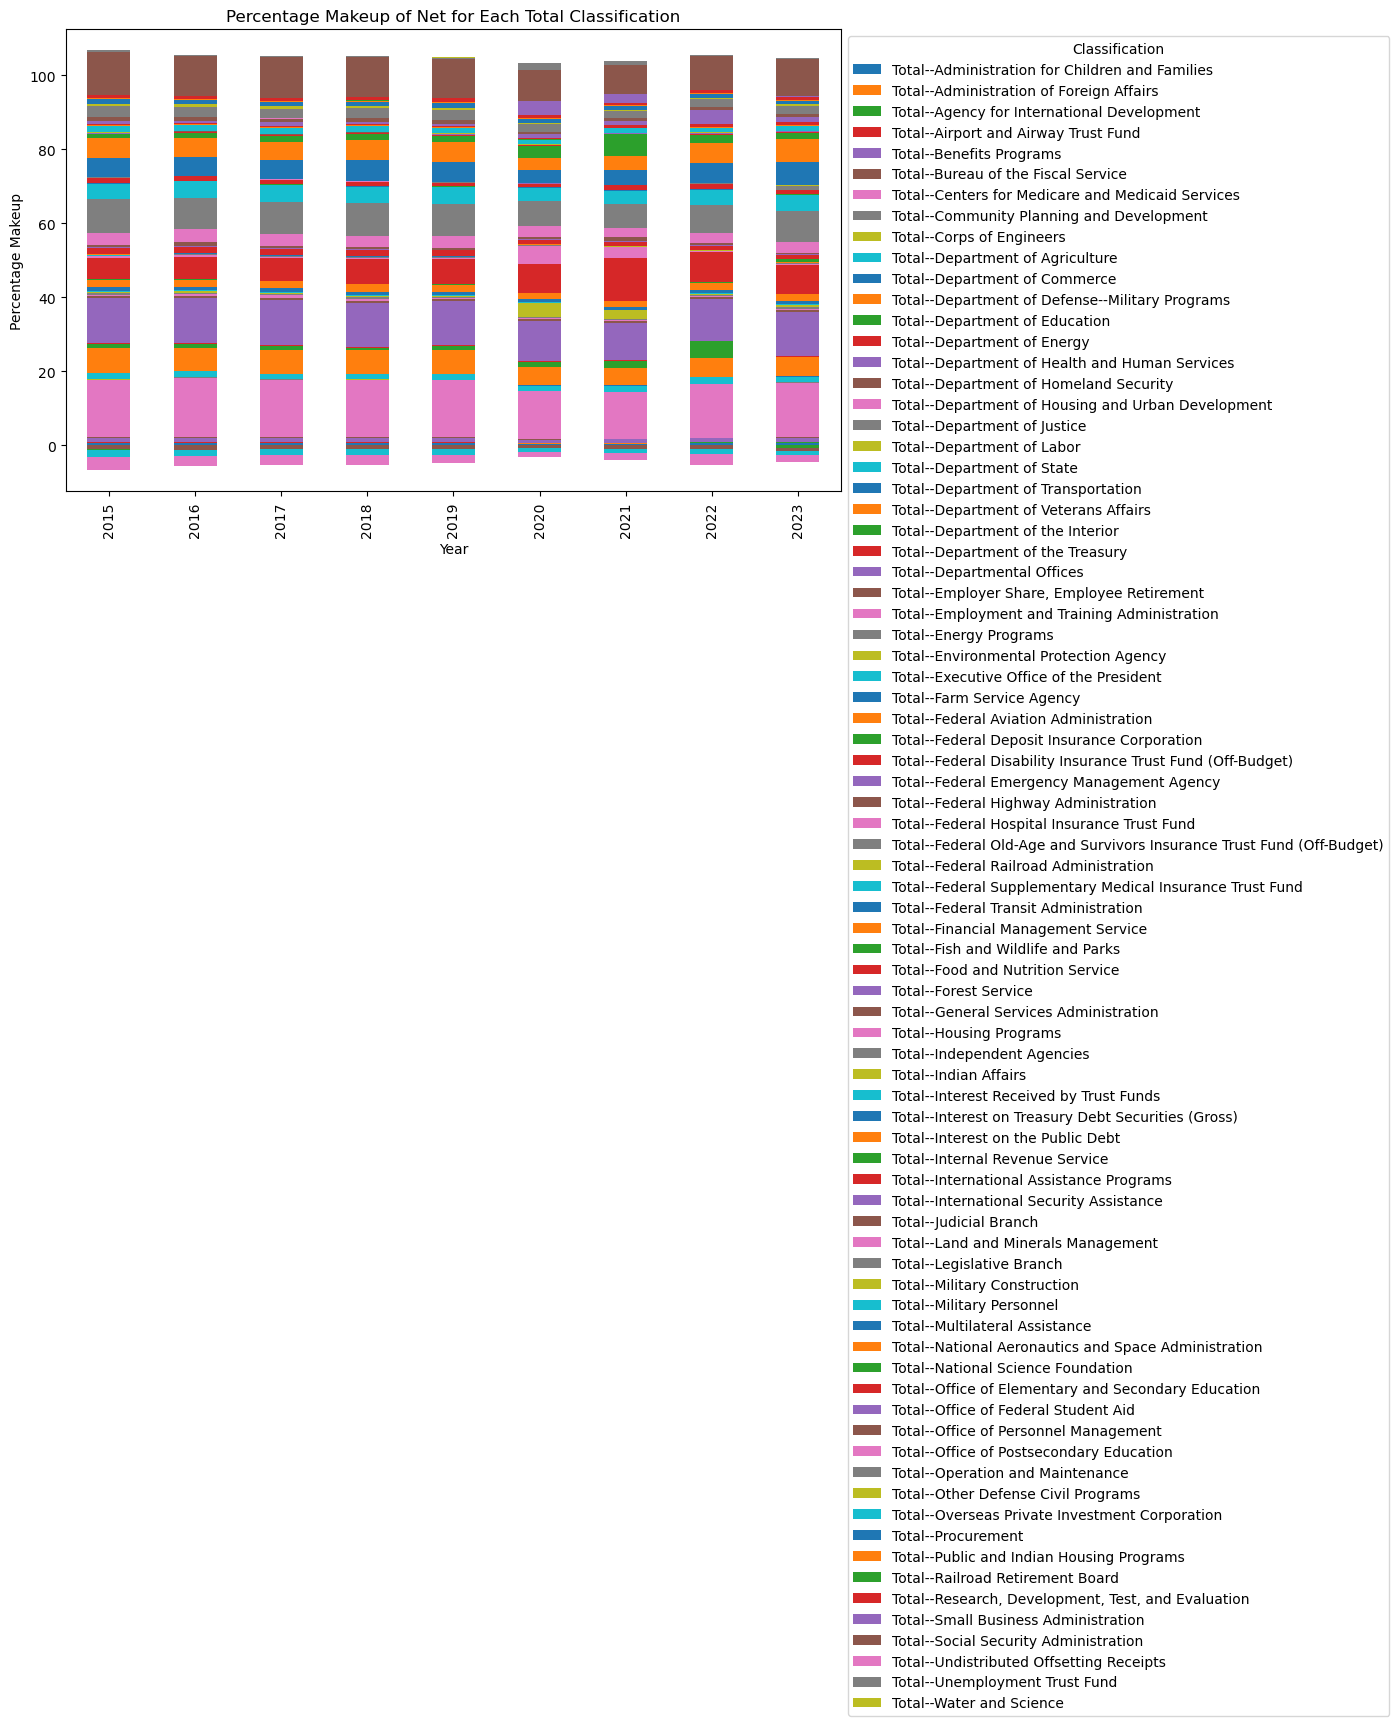

In [205]:
# Filter the DataFrame to include only rows where classification_desc starts with "total"
total_df = grouped_df[grouped_df['classification_desc'].str.startswith('Total--')]

# Calculate the total net for each year for the filtered DataFrame
total_net_per_year_total = total_df.groupby('record_date')['net'].sum()

# Calculate the percentage makeup of each net for each classification_desc
total_df['percentage_makeup'] = (total_df['net'] / total_net_per_year_total.loc[total_df['record_date'].values].values).mul(100)

# Pivot the filtered DataFrame for easier plotting
pivot_df_total = total_df.pivot(index='record_date', columns='classification_desc', values='percentage_makeup')

# Plotting
fig_total, ax_total = plt.subplots(figsize=(10, 6))
pivot_df_total.plot(kind='bar', stacked=True, ax=ax_total)

# Adding labels and title
ax_total.set_xlabel('Year')
ax_total.set_ylabel('Percentage Makeup')
ax_total.set_title('Percentage Makeup of Net for Each Total Classification')

# Display the legend
ax_total.legend(title='Classification', bbox_to_anchor=(1, 1))

annotation = ax.annotate(
    text='',
    xy=(0, 0),
    xytext=(100, 100), # distance from x, y
    textcoords='offset points',
    bbox={'boxstyle': 'round', 'fc': 'w'},
    arrowprops={'arrowstyle': '->'}
)
annotation.set_visible(False)


# Step 3. Implement the hover event to display annotations
def motion_hover(event):
    annotation_visbility = annotation.get_visible()
    if event.inaxes == ax:
        is_contained, annotation_index = scatter.contains(event)
        if is_contained:
            data_point_location = scatter.get_offsets()[annotation_index['ind'][0]]
            annotation.xy = data_point_location

            text_label = '({0:.2f}, {0:.2f})'.format(data_point_location[0], data_point_location[1])
            annotation.set_text(text_label)

            annotation.get_bbox_patch().set_facecolor(cmap(norm(colors[annotation_index['ind'][0]])))
            annotation.set_alpha(0.4)

            annotation.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if annotation_visbility:
                annotation.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', motion_hover)

plt.show()



In [235]:
exclude_values = ['Total--Undistributed Offsetting Receipts', 'Total--Interest Received by Trust Funds', 'Total--Employer Share, Employee Retirement']

# Create a boolean mask to exclude specified values
exclude_mask = ~grouped_total_df['classification_desc'].isin(exclude_values)

# Apply the mask to filter the DataFrame
filtered_sorted_total_df = grouped_total_df[exclude_mask].sort_values(by='net', ascending=False)

# Display the filtered and sorted DataFrame
# print(filtered_sorted_total_df.tail(50))
filtered_sorted_total_df.loc[filtered_sorted_total_df['record_date'] == '2023'].sort_values(by='net', ascending="True")

ValueError: For argument "ascending" expected type bool, received type str.

In [9]:
df['year'] = df['record_date'].dt.to_period("Y")

# Group by the 'year' column and sum 'total_accepted' for each year
result = df.groupby('year')['total_accepted'].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
result.plot(kind='bar', color='skyblue')
plt.title('Treasury Offering Amount by Year')
plt.xlabel('Year')
plt.ylabel('Treasury offering amount, in $ trillions')
plt.show()

KeyError: 'Column not found: total_accepted'

/tmp/ipykernel_24807/537838051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['record_date'] = df['record_date'].dt.to_period("Y")


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

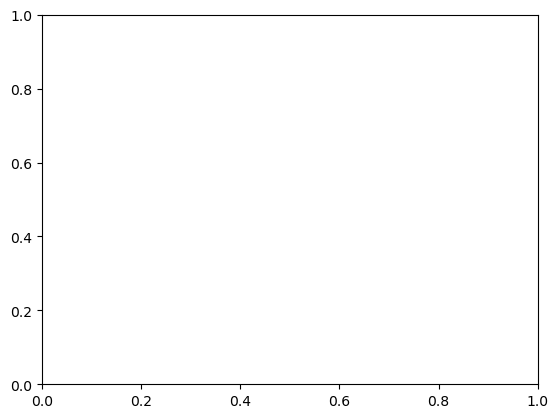

In [227]:
new = filtered_sorted_total_df.loc[filtered_sorted_total_df['classification_desc'] == 'Total--Interest on the Public Debt']
new
new['record_date'] = df['record_date'].dt.to_period("Y")


fig, ax = plt.subplots()
ax.bar(new['record_date'], new['net'])
plt.show()
                                                                        

result_numeric: record_date  classification_desc                     
2015         Department of Agriculture                   11930.0
             Department of Commerce                        766.0
             Department of Defense--Military Programs    47758.0
             Department of Education                      7555.0
             Department of Energy                         2158.0
                                                          ...   
2023         Department of Transportation                 9201.0
             Department of the Interior                   1404.0
             Department of the Treasury:                     0.0
             Judicial Branch                               770.0
             Legislative Branch                            561.0
Name: current_month_rcpt_outly_amt, Length: 145, dtype: float64
yearly_sums_numeric: record_date  classification_desc                     
2015         Department of Agriculture                   179350.0
          

<IPython.core.display.Javascript object>


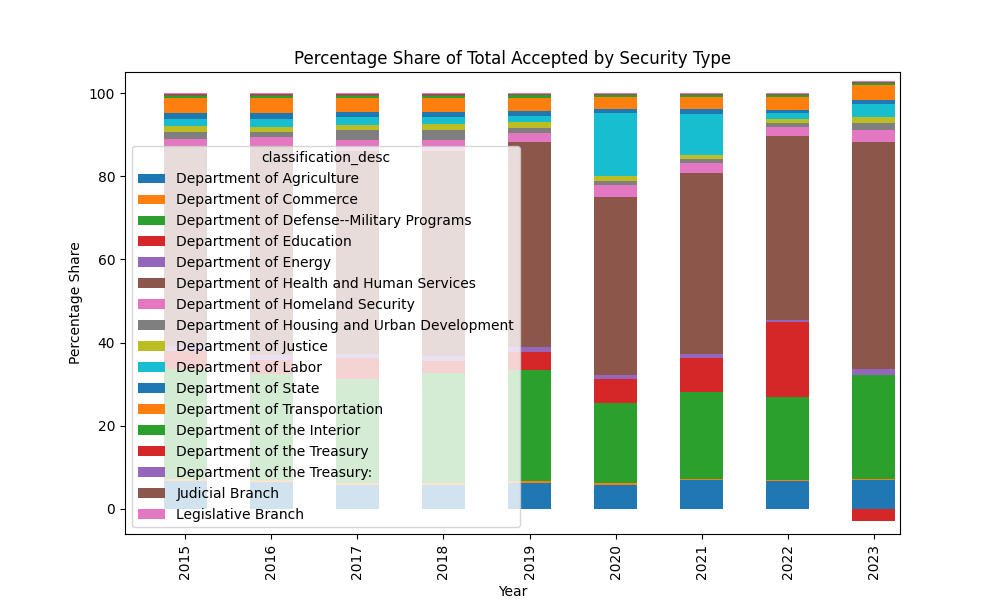

In [550]:
# df['src_line_nbr'] = pd.to_numeric(df['src_line_nbr'], errors='coerce')
# newdf = df.loc[(df['src_line_nbr'] >= 17) & (df['src_line_nbr'] <= 32), :].copy()
newdf.loc[:, 'current_month_rcpt_outly_amt'] = pd.to_numeric(newdf['current_month_rcpt_outly_amt'], errors='coerce')
newdf.loc[:, 'current_month_rcpt_outly_amt'] = (newdf['current_month_rcpt_outly_amt'] / 10000000).round()
result = newdf.groupby([newdf['record_date'].dt.to_period("Y"), 'classification_desc'])['current_month_rcpt_outly_amt'].sum()
result_numeric = pd.to_numeric(result, errors='coerce')


# Calculate the sum of all security types for each year
yearly_sums = result.groupby(level=0).transform('sum')


# Convert the columns to numeric type
yearly_sums_numeric = pd.to_numeric(yearly_sums, errors='coerce')

# Debugging statements
print("result_numeric:", result_numeric)
print("yearly_sums_numeric:", yearly_sums_numeric)

# Calculate the percentage share for each security type
percentage_share = result_numeric / yearly_sums_numeric * 100


# Reset the index to make 'record_date' a column
percentage_share = percentage_share.reset_index()

# Pivot the DataFrame for easier plotting
pivot_df = percentage_share.pivot(index='record_date', columns='classification_desc', values='current_month_rcpt_outly_amt')

# Plot the percentages using a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Share')
ax.set_title('Percentage Share of Total Accepted by Security Type')

# Show the plot
plt.show()

In [528]:
result = df.groupby([df['record_date'].dt.to_period("Y"), 'security_type'])['total_accepted'].sum()

# Calculate the sum of all security types for each year
yearly_sums = result.groupby(level=0).transform('sum')



# Calculate the percentage share for each security type
percentage_share = result / yearly_sums * 100

# Reset the index to make 'record_date' a column
percentage_share = percentage_share.reset_index()

# Pivot the DataFrame for easier plotting
pivot_df = percentage_share.pivot(index='record_date', columns='security_type', values='total_accepted')

# Plot the percentages using a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Share')
ax.set_title('Percentage Share of Total Accepted by Security Type')

# Show the plot
plt.show()

KeyError: 'security_type'

In [512]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'record_date' to datetime
newdf['record_date'] = pd.to_datetime(newdf['record_date'])

# Calculate percentage change for each classification_id
newdf['percentage_change'] = newdf.groupby('classification_id')['current_month_rcpt_outly_amt'].pct_change() * 100

# Drop rows with NaN values in 'percentage_change'
newdf = newdf.dropna(subset=['percentage_change'])

# Find the classification_id with the highest percentage change
max_change_row = newdf.loc[newdf['percentage_change'].idxmax()]

print("Classification ID with the highest percentage change:")
print(max_change_row[['classification_id', 'percentage_change']])


TypeError: reduction operation 'argmax' not allowed for this dtype

In [335]:
# BTC SCATTER PLOT
df.loc[:, 'bid_to_cover_ratio'] = pd.to_numeric(df['bid_to_cover_ratio'], errors='coerce')
fig, ax = plt.subplots()
ax.scatter(df['auction_date'], df['bid_to_cover_ratio'])
num_ticks = 20
yticks = plt.MaxNLocator(num_ticks)
ax.yaxis.set_major_locator(yticks)  # Rotate x-axis labels for better visibility
plt.show()

# FILTERING FOR BILLS ONLY
df_bills = df.loc[df['security_type'] != "Bill", :].copy()
df_bills.loc[:, 'total_tendered'] = pd.to_numeric(df_bills['total_tendered'], errors='coerce')
newdf.loc[:, 'record_date'] = pd.to_datetime(newdf['record_date'])
df_bills.loc[:, 'total_tendered'] = (df_bills['total_tendered'] / 1000000).round()

# PLOTTING SURPLUS BY FYTD
fig, ax = plt.subplots()
ax.bar(surplus['record_date'], surplus['current_fytd_rcpt_outly_amt'])

ax.set_ylabel('millions')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

# Adjust the number of ticks and rotation for better visibility
num_ticks = 20
xticks = plt.MaxNLocator(num_ticks)
ax.xaxis.set_major_locator(xticks)

# ADVANCED FILTERING
newdf = df.loc[(df['src_line_nbr'] >= 17) & (df['src_line_nbr'] <= 32), :].copy()
newdf.assign(total=newdf['current_fytd_rcpt_outly_amt']-newdf['prior_fytd_rcpt_outly_amt']).sort_values('total', ascending=False).iloc[:50]
df['src_line_nbr'] = pd.to_numeric(df['src_line_nbr'], errors='coerce')
newdf = df.loc[(df['src_line_nbr'] >= 17) & (df['src_line_nbr'] <= 32), :].copy()

# Plot YTD Expenses by department
plt.rcParams['figure.figsize'] = [10, 10]
# Convert 'month' to datetime for correct sorting
newdf['record_date'] = pd.to_datetime(newdf['record_date'], format='%Y-%m-%d')

# Create a line plot for each department
fig, ax = plt.subplots()

for department, group in newdf.groupby('classification_desc'):
    ax.plot(group['record_date'], group['current_fytd_rcpt_outly_amt'], label=department)

ax.set_xlabel('Month')
ax.set_ylabel('y Value')
ax.set_title('y Value for Each Department Over Months')
ax.legend(title='Department')

plt.figure(figsize=(12.8,7.2))
plt.show()

# PLOT THE DEFECIT API HAS TO BE PAGE 3 INSTEAD OF 5
df.loc[:, 'src_line_nbr'] = pd.to_numeric(df['src_line_nbr'], errors='coerce')
surplus_deficit = df.loc[(df['classification_desc'] == 'Total Outlays') | (df['classification_desc'] == 'Total Receipts'), :].copy()
surplus_deficit.loc[:, 'current_month_rcpt_outly_amt'] = pd.to_numeric(surplus_deficit['current_month_rcpt_outly_amt'], errors='coerce')
surplus_deficit.loc[:, 'current_month_rcpt_outly_amt'] = (surplus_deficit['current_month_rcpt_outly_amt'] / 1000000)
pivot_df = surplus_deficit.pivot(index='record_date', columns='classification_desc', values='current_month_rcpt_outly_amt').reset_index()
# Create the 'surplus_deficit' column by subtracting 'outgoing' from 'incoming'
pivot_df['surplus_deficit'] = pivot_df['Total Receipts'] - pivot_df['Total Outlays']
# Merge the result back to the original DataFrame based on the 'date' column
surplus_deficit = pd.merge(surplus_deficit, pivot_df[['record_date', 'surplus_deficit']], on='record_date')
# surplus_deficit.groupby(df['record_date'].dt.to_period("M"))['current_month_rcpt_outly_amt'].sum()


KeyError: 'bid_to_cover_ratio'